# Student Performance Prediction and Classification

This project aims to analyze and predict student academic performance based on various factors. We will explore different regression and classification models to predict final score, final grade, and pass fail outcomes.

Students:
- Mohammed Ali Sadek, 202200594
- Ahmed Amgad, 202200393
- Abdulrahman Madgy, 202200341
- SalahDin Ahmed Rezk, 202201079

# Load data frame

In [66]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix, roc_curve, auc, RocCurveDisplay, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBRegressor
from imblearn.over_sampling import SMOTE
from collections import Counter

import matplotlib.pyplot as plt
import numpy as np
import numpy as np
import pandas as pd
import seaborn as sns
import joblib

In [ ]:
df = pd.read_csv("Term_Project_Dataset_20K.csv")
df.describe()

,age,parent_income,num_siblings,family_support,commute_time_min,previous_gpa,num_failed_courses,high_school_grade,math_background_score,language_background_score,...,sleep_hours,motivation_level,study_time_per_week,concentration_level,exam_anxiety_level,course_difficulty_rating,teacher_experience_years,class_size,num_prerequisites,final_score
count,19400.000000,19400.000000,19400.000000,19400.000000,19400.000000,19400.000000,19400.000000,19400.000000,19400.000000,19400.000000,...,19400.000000,19400.000000,19400.000000,19400.000000,19400.000000,19400.000000,19400.000000,19400.000000,19400.000000,19400.000000
mean,23.478918,18290.515928,2.510361,2.502680,59.318144,2.491322,1.996443,74.902892,49.352577,49.412268,...,6.453149,4.980619,19.614691,4.957680,5.013299,2.997526,20.072680,109.904381,1.996546,66.542747
std,3.452709,30896.118002,1.715978,1.707515,34.796772,0.869089,1.413680,14.425122,28.890298,28.842990,...,2.148505,3.159022,11.485281,3.160975,3.180374,1.409721,11.294943,52.009036,1.412659,11.050014
min,18.000000,2000.000000,0.000000,0.000000,0.000000,1.000000,0.000000,50.000000,0.000000,0.000000,...,-5.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,20.000000,0.000000,25.700000
25%,20.000000,9087.000000,1.000000,1.000000,29.000000,1.730000,1.000000,62.400000,24.000000,24.000000,...,4.700000,2.000000,10.000000,2.000000,2.000000,2.000000,10.000000,65.000000,1.000000,58.800000
50%,23.000000,16102.000000,3.000000,3.000000,59.000000,2.500000,2.000000,74.800000,49.000000,49.000000,...,6.500000,5.000000,20.000000,5.000000,5.000000,3.000000,20.000000,110.000000,2.000000,66.500000
75%,26.000000,23108.500000,4.000000,4.000000,90.000000,3.240000,3.000000,87.400000,74.000000,75.000000,...,8.300000,8.000000,30.000000,8.000000,8.000000,4.000000,30.000000,155.000000,3.000000,74.300000
max,29.000000,596760.000000,5.000000,5.000000,119.000000,4.000000,4.000000,100.000000,99.000000,99.000000,...,10.000000,10.000000,39.000000,10.000000,10.000000,5.000000,39.000000,199.000000,4.000000,100.000000


# Preprocessing

## Data imputation

In [ ]:
df.isnull().sum()

,0
age,600
gender,600
parent_income,600
num_siblings,600
family_support,600
commute_time_min,600
part_time_job,600
previous_gpa,600
num_failed_courses,600
high_school_grade,600


In [ ]:
df['pass_fail'] = np.where((df['final_grade'] == 'F') | (df['final_score'] < 60) , 'Fail', 'Pass')

In [ ]:
# Identify numerical and categorical columns
numerical_cols = df.select_dtypes(include=['number']).columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# Impute numerical columns with the mean
for col in numerical_cols:
    if df[col].isnull().any():
        df[col] = df[col].fillna(df[col].mean())

# Impute categorical columns with the mode
for col in categorical_cols:
    if df[col].isnull().any():
        # .mode()[0] handles cases where there might be multiple modes
        df[col] = df[col].fillna(df[col].mode()[0])

print("Null values after imputation:")
print(df.isnull().sum())

Null values after imputation:
age                            0
gender                         0
parent_income                  0
num_siblings                   0
family_support                 0
commute_time_min               0
part_time_job                  0
previous_gpa                   0
num_failed_courses             0
high_school_grade              0
math_background_score          0
language_background_score      0
science_background_score       0
prior_semester_credits         0
study_hours_last_semester      0
past_attendance_rate           0
academic_warnings_count        0
lecture_attendance_rate        0
assignment_submission_rate     0
quiz_avg_score                 0
midterm_score                  0
lab_participation_rate         0
online_portal_usage_minutes    0
group_project_activity         0
library_visits_per_month       0
discussion_forum_posts         0
lateness_count                 0
stress_level                   0
sleep_hours                    0
motivation_le

## Handling outliers

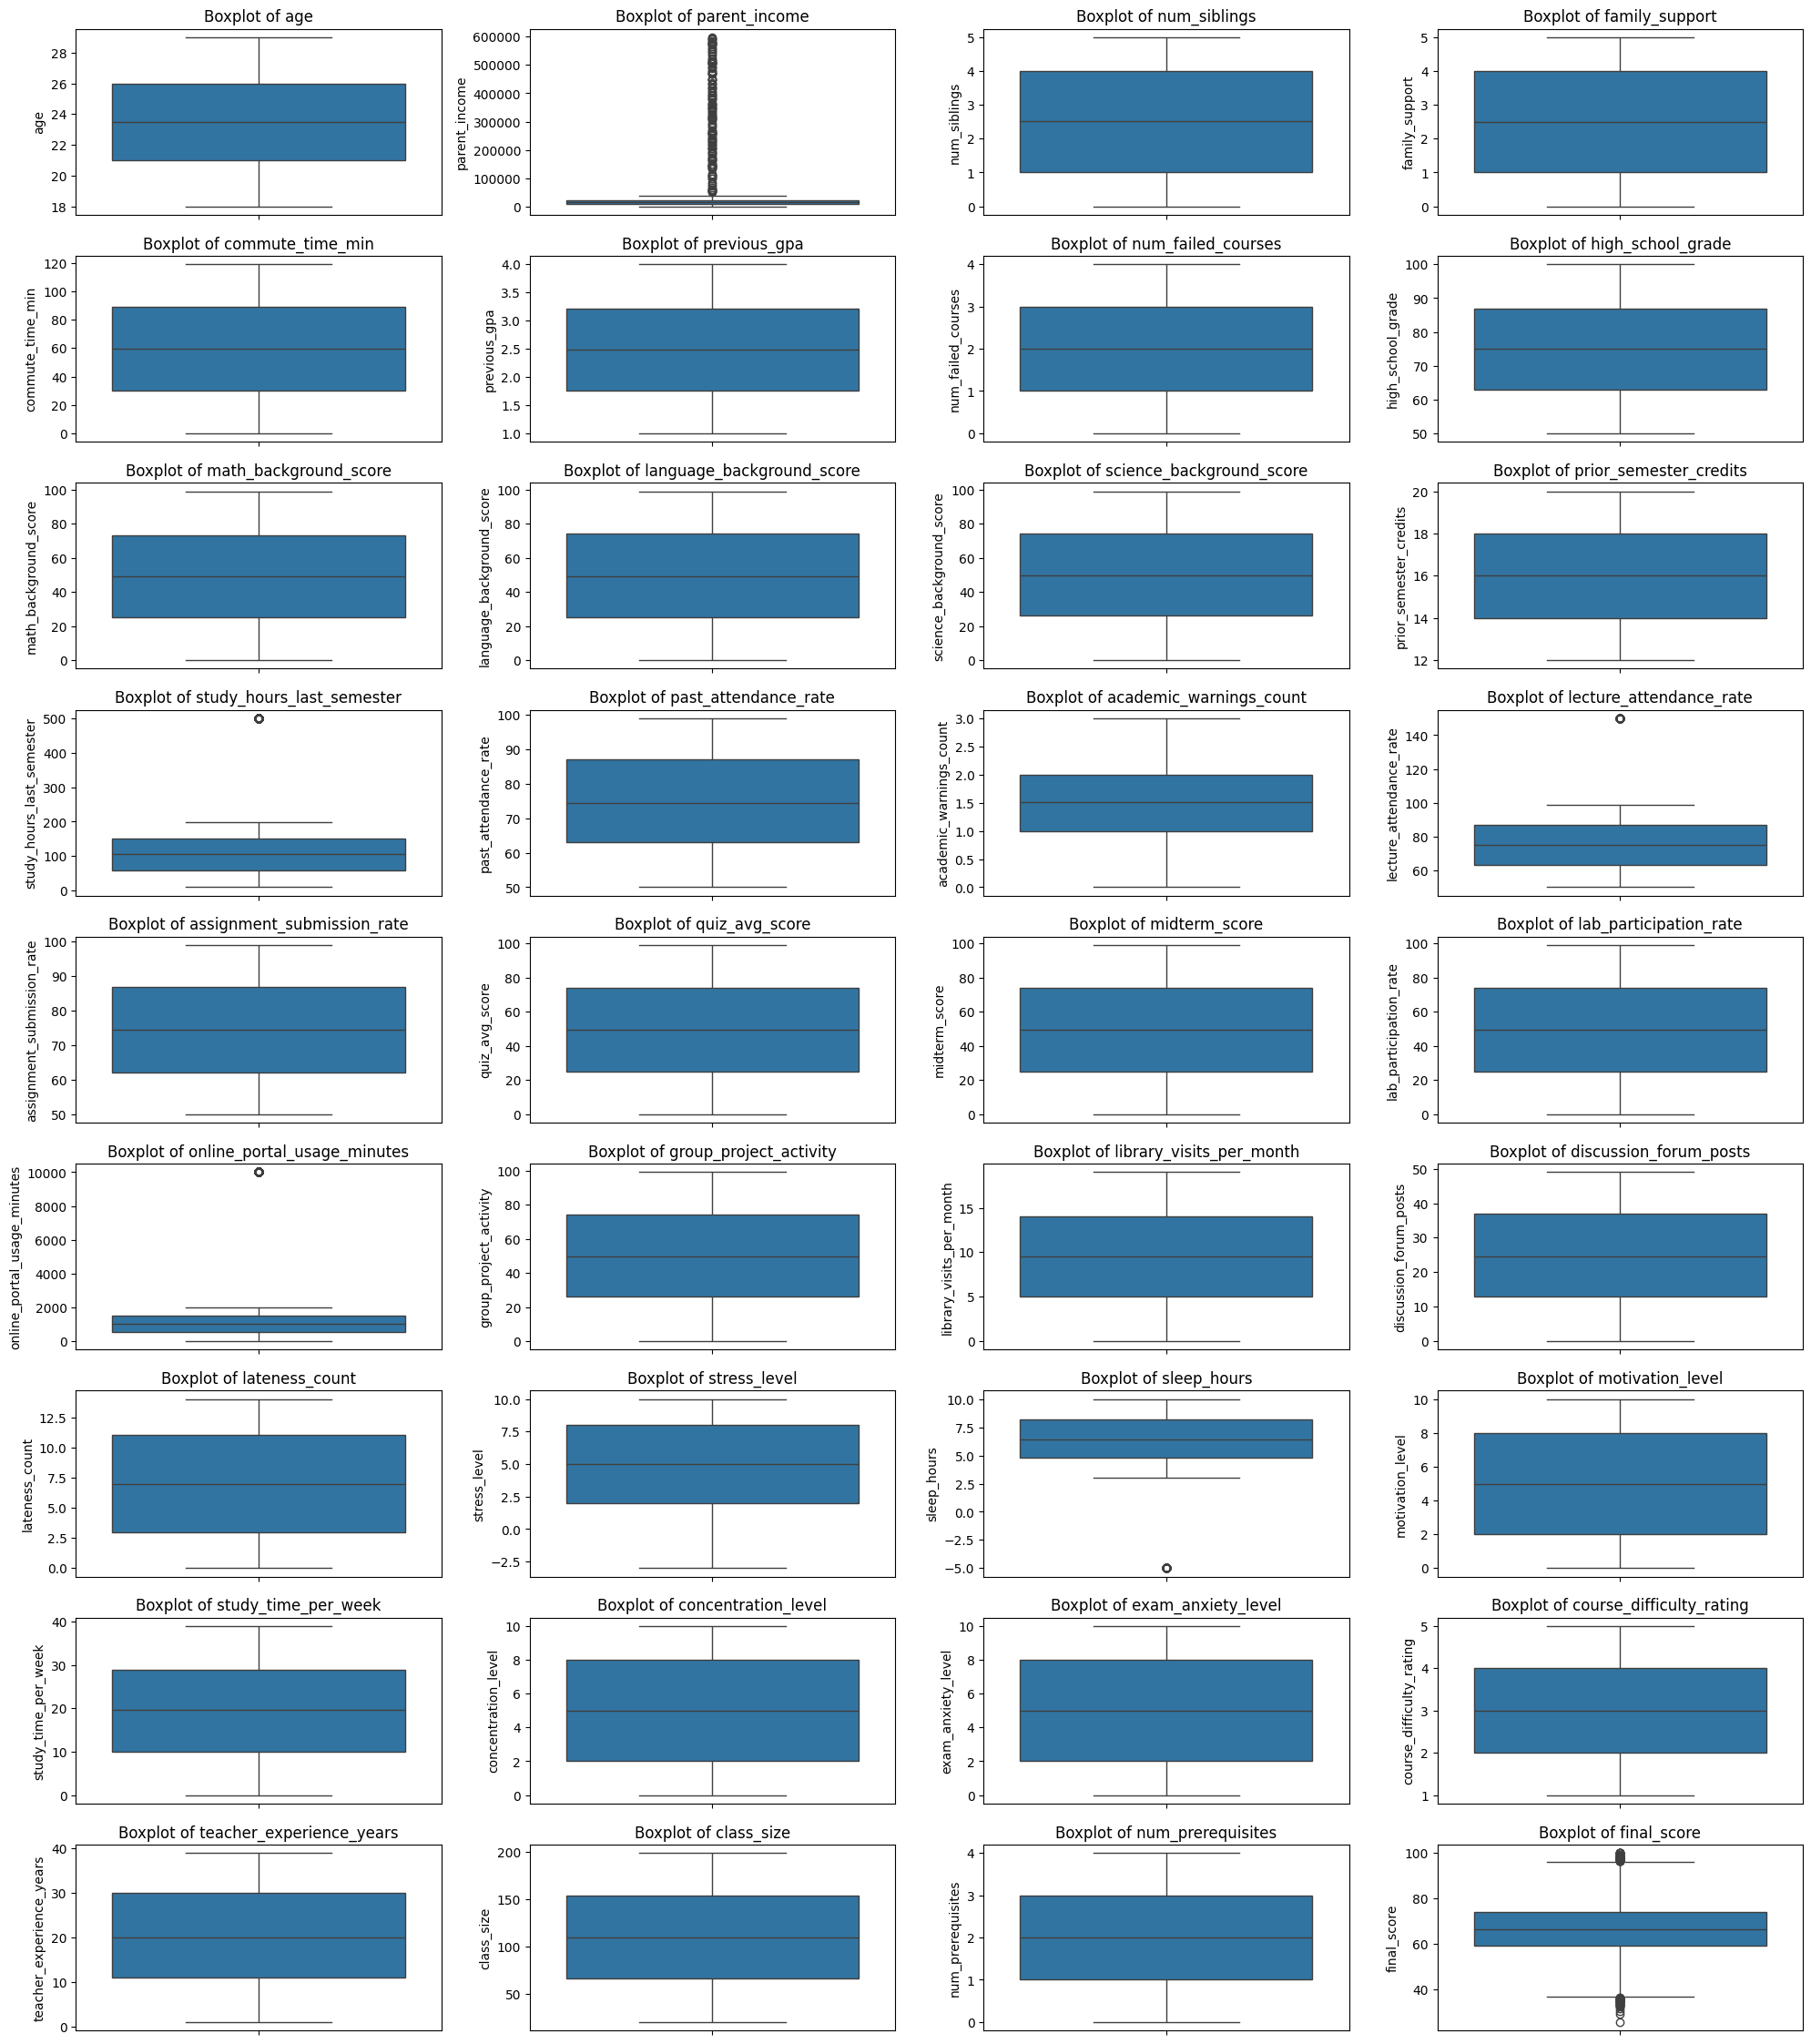

In [ ]:
plt.figure(figsize=(20, 25))
for i, col in enumerate(numerical_cols):
    plt.subplot(len(numerical_cols) // 4 + 1, 4, i + 1) # Adjust subplot grid as needed
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

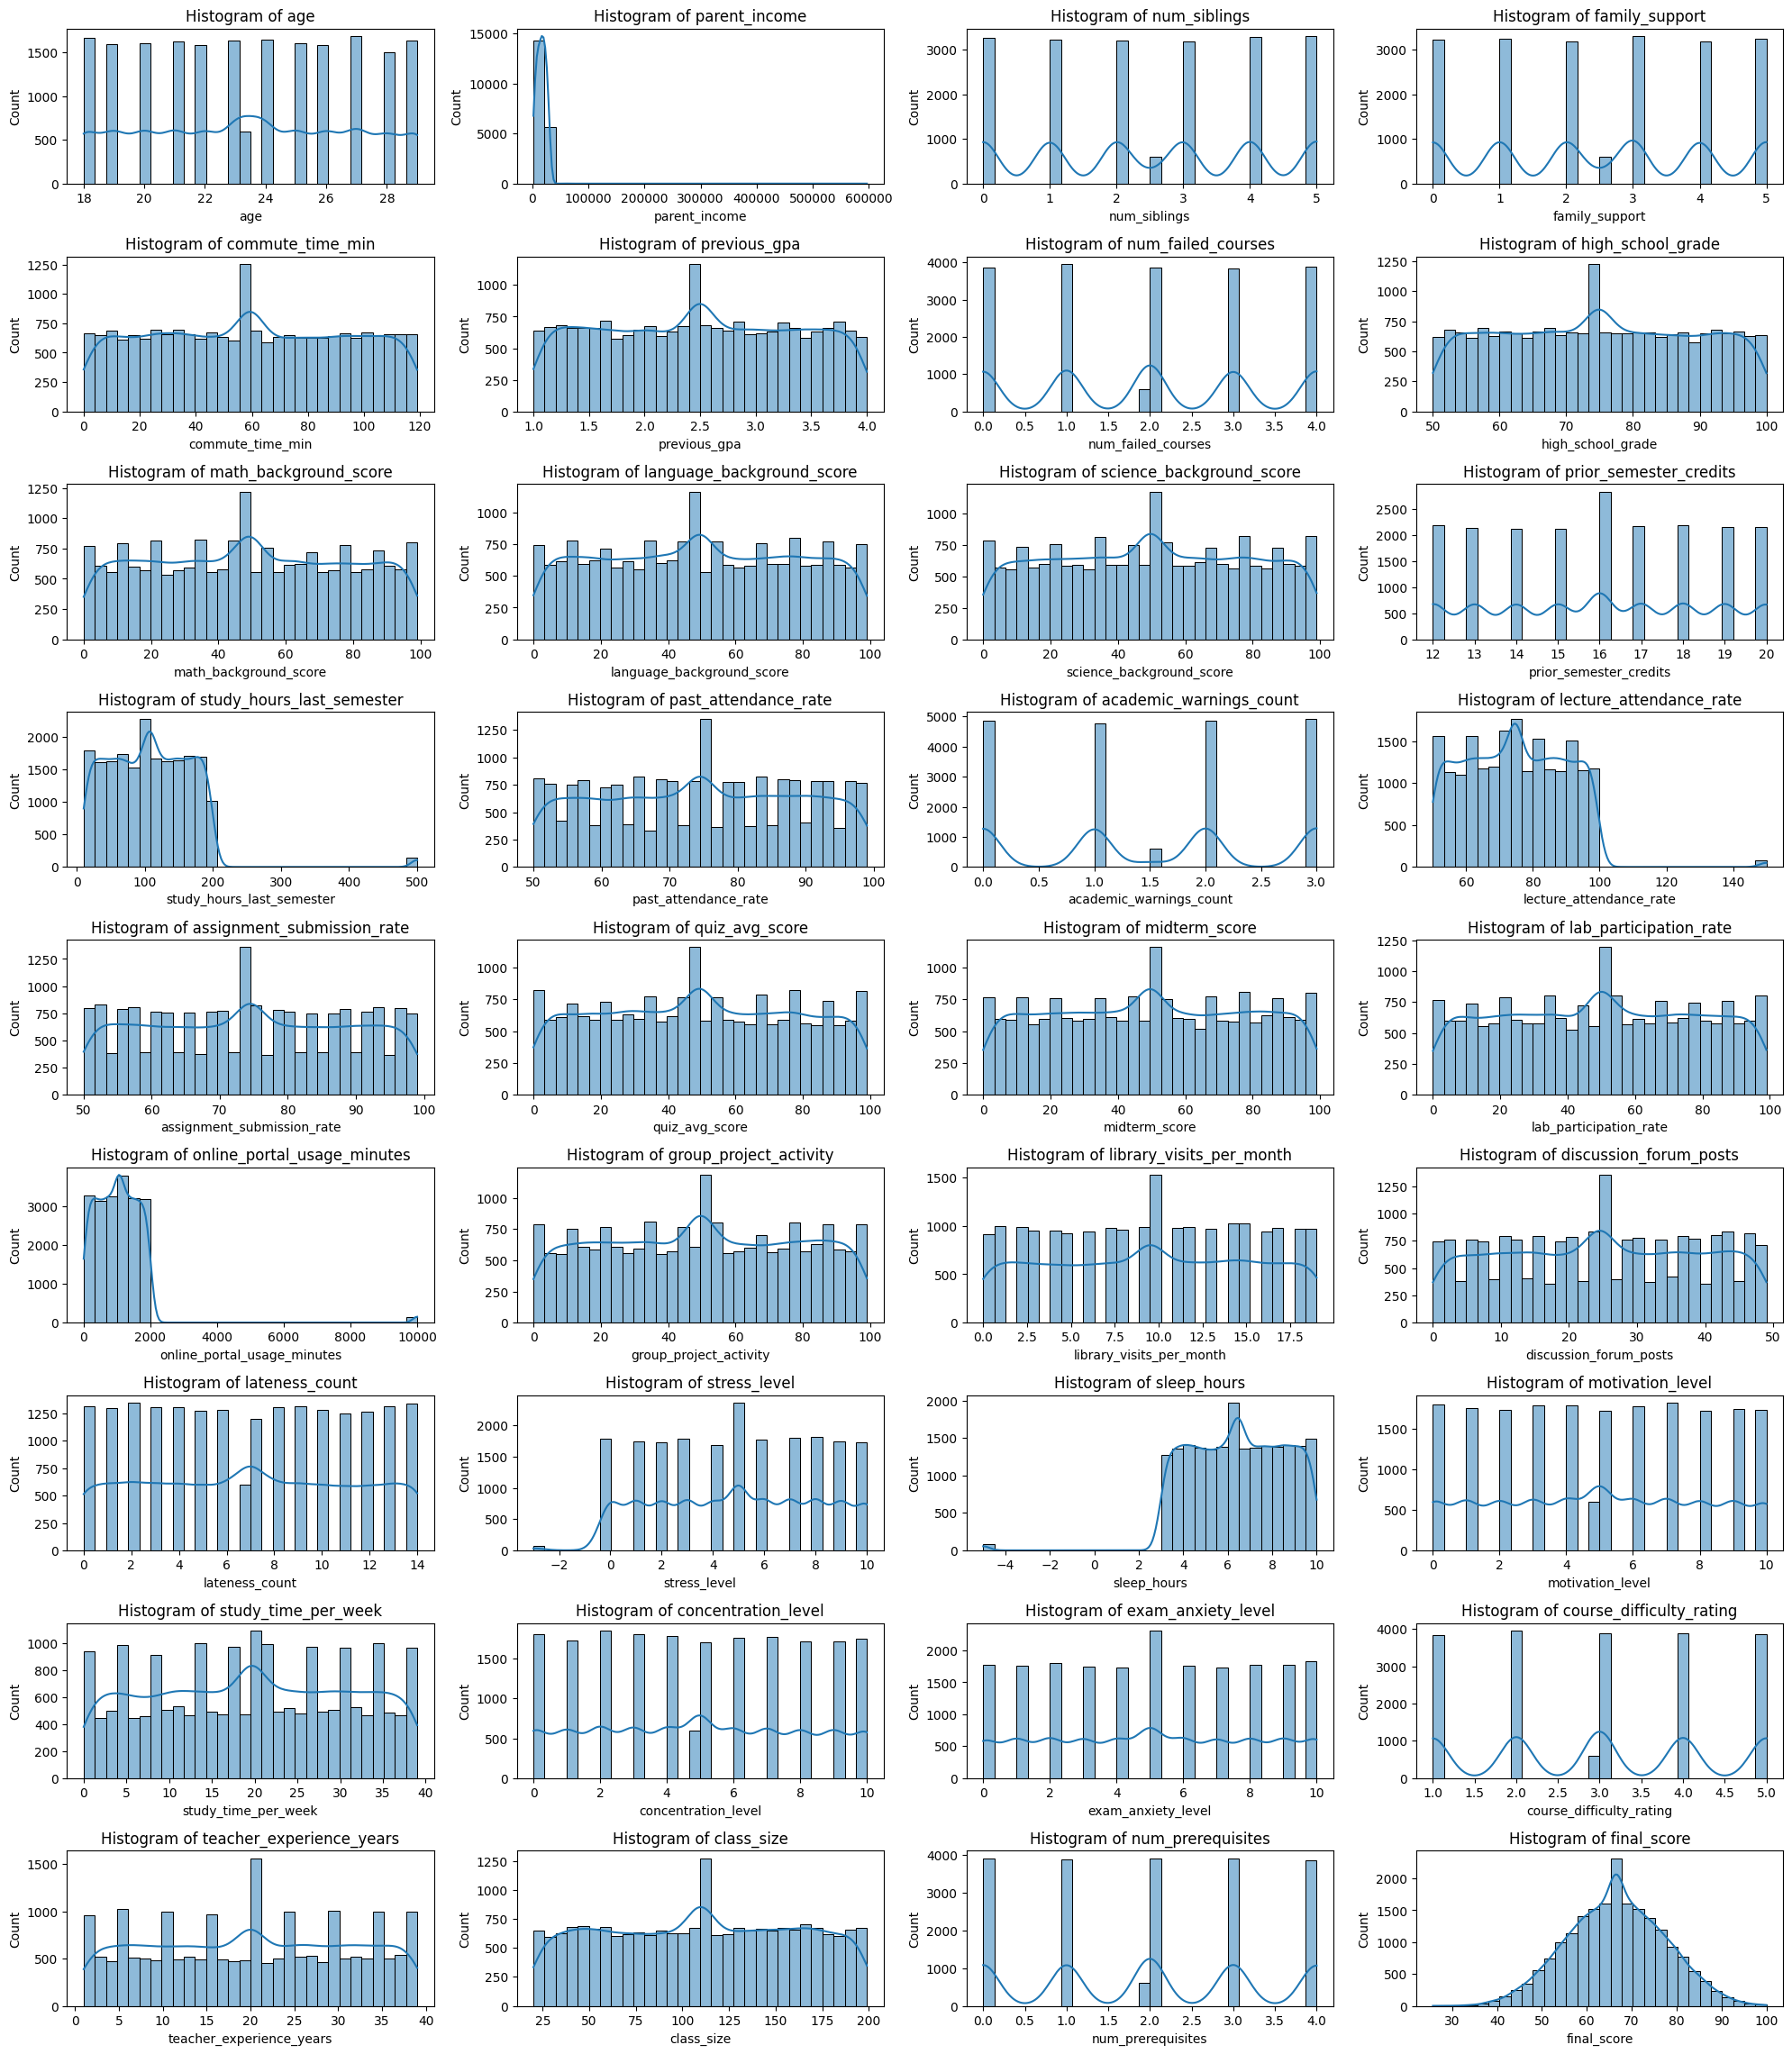

In [ ]:
plt.figure(figsize=(20, 25))
for i, col in enumerate(numerical_cols):
    plt.subplot(len(numerical_cols) // 4 + 1, 4, i + 1)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Histogram of {col}')

plt.tight_layout()
plt.show()

We can see the following distributions contain outliers:
- parent income
- study hours last semester
- lecture attendance rate
- online portal usage minutes
- stress level
- sleep hours

Most of them are uniform distributions, so only hard cutoffs are needed, while parent income follows a skewd distribution similar to [Pareto distribution](https://en.wikipedia.org/wiki/Pareto_distribution), so it needs to be handeled with more care.

Final score follows a normal distribution.

In [ ]:
# Handle outliers for parent_income using log transformation (for skewed distribution) and then capping
df['parent_income'] = np.log1p(df['parent_income'])
lower_bound_parent_income = df['parent_income'].quantile(0.01)
upper_bound_parent_income = df['parent_income'].quantile(0.99)
df['parent_income'] = df['parent_income'].clip(lower=lower_bound_parent_income, upper=upper_bound_parent_income)

# Handle outliers for study_hours_last_semester by capping at 99th percentile
upper_bound_study_hours = df['study_hours_last_semester'].quantile(0.99)
df['study_hours_last_semester'] = df['study_hours_last_semester'].clip(upper=upper_bound_study_hours)

# Handle outliers for lecture_attendance_rate by capping at 1st and 99th percentiles
# This helps normalize extreme low/high attendance rates without removing valid data points
lower_bound_lecture_att = df['lecture_attendance_rate'].quantile(0.01)
upper_bound_lecture_att = df['lecture_attendance_rate'].quantile(0.99)
df['lecture_attendance_rate'] = df['lecture_attendance_rate'].clip(lower=lower_bound_lecture_att, upper=upper_bound_lecture_att)

# Handle outliers for online_portal_usage_minutes by capping at 1st and 99th percentiles
lower_bound_online_portal_usage_minutes = df['online_portal_usage_minutes'].quantile(0.01)
upper_bound_online_portal_usage_minutes = df['online_portal_usage_minutes'].quantile(0.99)
df['online_portal_usage_minutes'] = df['online_portal_usage_minutes'].clip(lower=lower_bound_online_portal_usage_minutes, upper=upper_bound_online_portal_usage_minutes)

# Handle outliers for stress_level by capping at 1st and 99th percentiles (as it's a rating scale)
lower_bound_stress = df['stress_level'].quantile(0.01)
upper_bound_stress = df['stress_level'].quantile(0.99)
df['stress_level'] = df['stress_level'].clip(lower=lower_bound_stress, upper=upper_bound_stress)

# Handle outliers for sleep_hours by capping to a reasonable physiological range (e.g., 3 to 14 hours)
df['sleep_hours'] = df['sleep_hours'].clip(lower=3, upper=14)


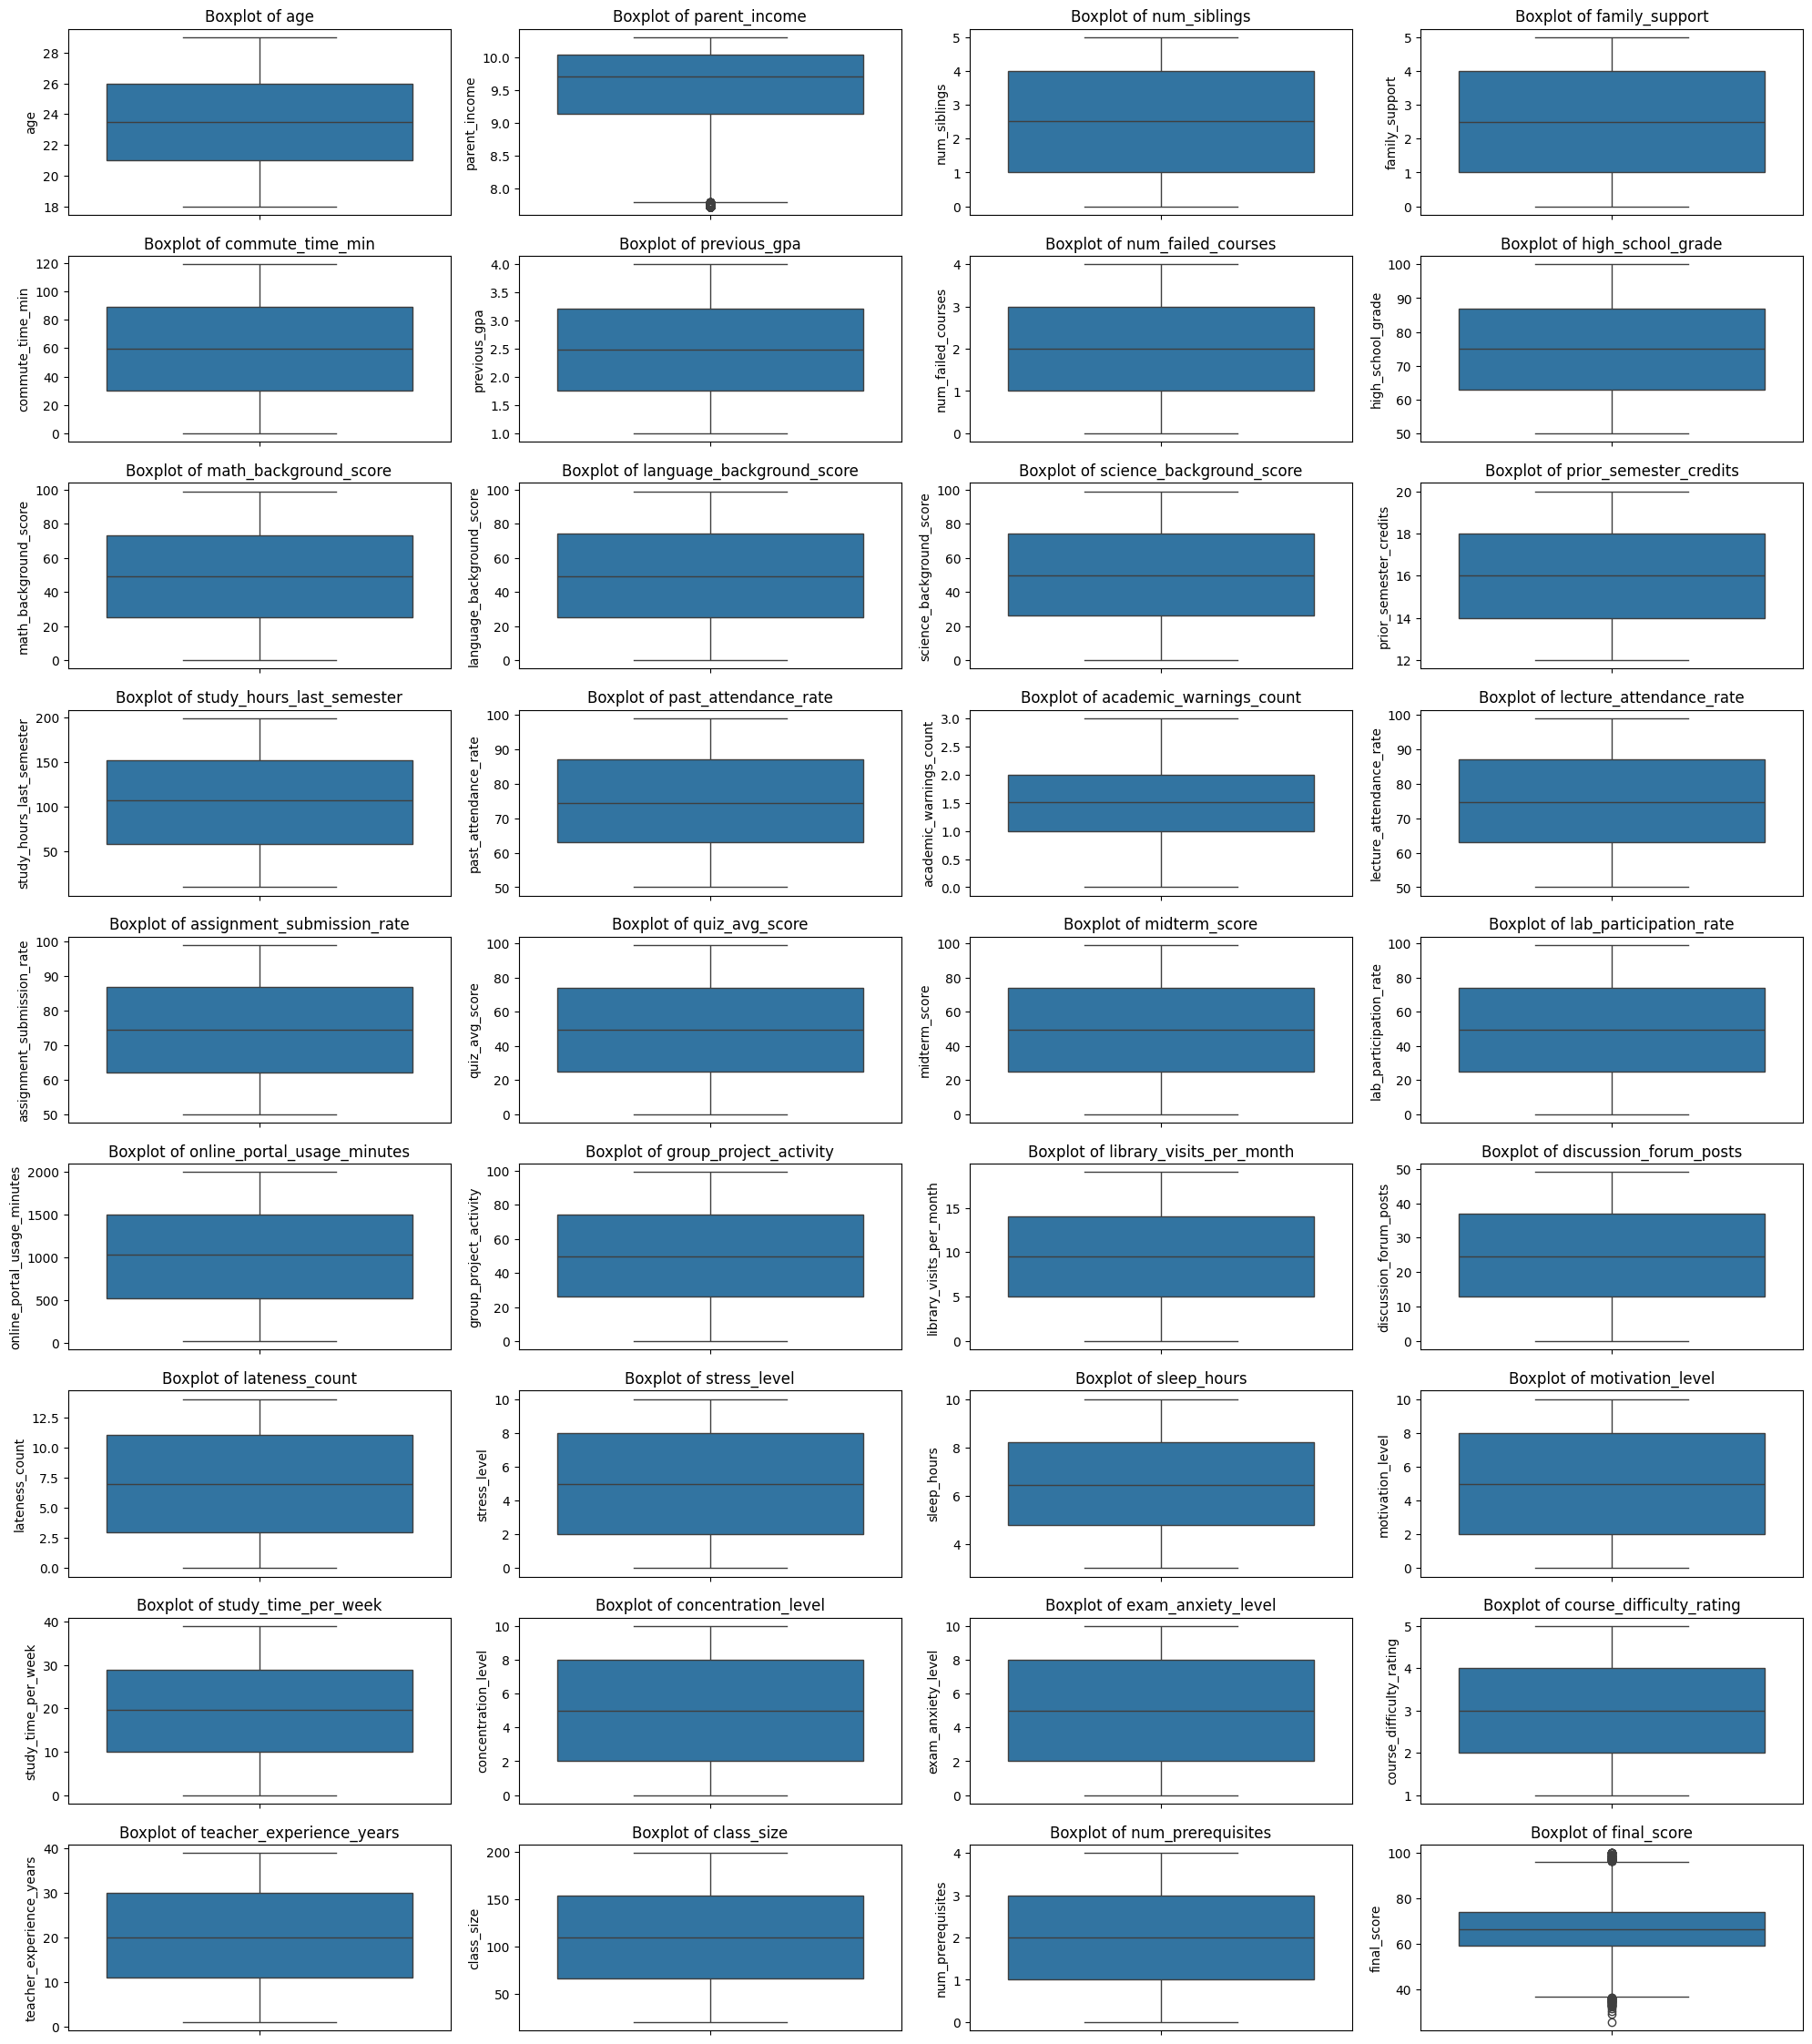

In [ ]:
plt.figure(figsize=(20, 25))
for i, col in enumerate(numerical_cols):
    plt.subplot(len(numerical_cols) // 4 + 1, 4, i + 1) # Adjust subplot grid as needed
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

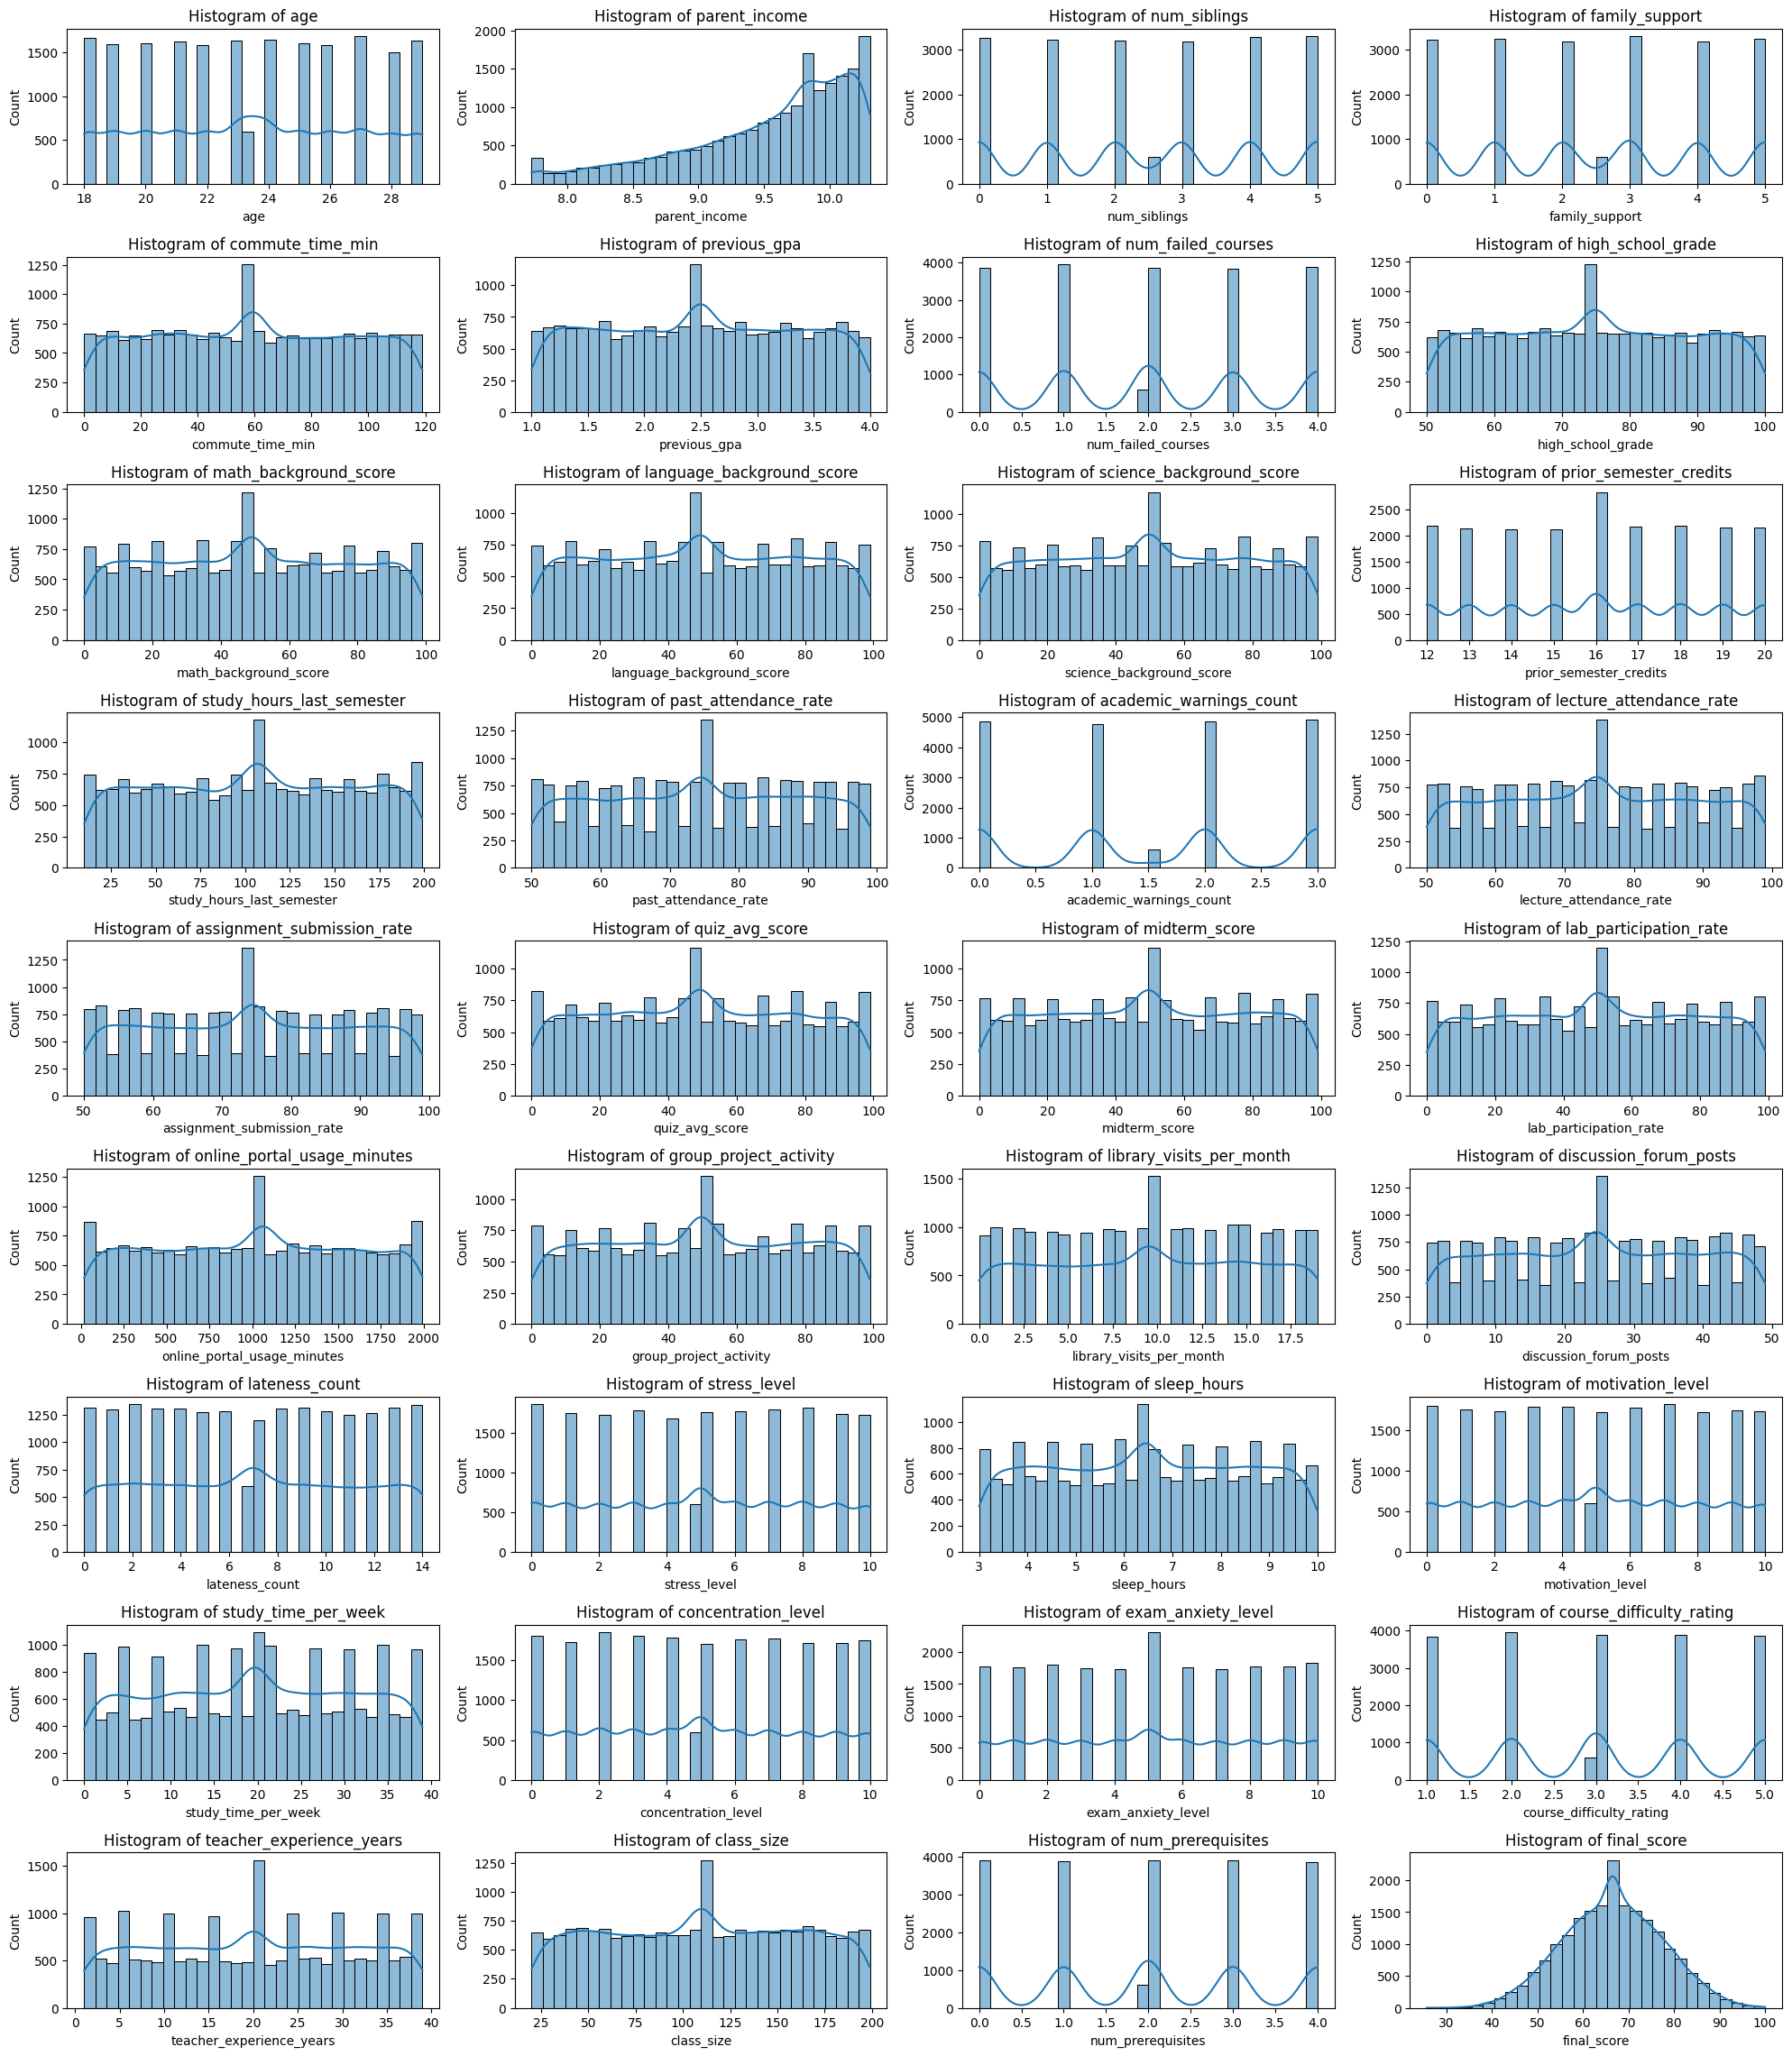

In [ ]:
plt.figure(figsize=(20, 25))
for i, col in enumerate(numerical_cols):
    plt.subplot(len(numerical_cols) // 4 + 1, 4, i + 1)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Histogram of {col}')

plt.tight_layout()
plt.show()

## Feature engineering

* **Study–attendance ratio** highlights inefficiency or misalignment since high study time with low attendance often signals compensating behavior or poor lecture utility.

* **Quiz–midterm interaction** captures performance consistency since strong students tend to perform well across assessments while weak ones collapse under cumulative evaluation.

* **Engagement score** aggregates multiple participation signals into a single behavioral metric reducing noise from any one platform or activity.

* **Academic strength** summarizes prior preparation since foundational gaps matter more than any single background score.

* **Stress–sleep ratio** exposes burnout risk since stress is only harmful relative to recovery not in isolation.

* **Workload pressure** models cumulative cognitive load since credits prerequisites and study hours compound rather than act independently.

* **Attendance penalty** combines absence and lateness to reflect effective disengagement rather than nominal presence.

* **Difficulty–experience interaction** encodes context since instructor experience only matters relative to course complexity.

* **Academic history interaction** amplifies risk signals since warnings under heavy credit loads are more predictive of failure than warnings alone.

In [ ]:
df['study_attendance_ratio'] = (df['study_time_per_week'] / df['lecture_attendance_rate'])
df['teacher_exp_class_size'] = (df['teacher_experience_years'] / df['teacher_experience_years'])
df['quiz_midterm_interaction'] = (df['quiz_avg_score'] * df['midterm_score'])

engagement_features = [
    'lecture_attendance_rate',
    'assignment_submission_rate',
    'lab_participation_rate',
    'group_project_activity',
    'discussion_forum_posts'
]

df['engagement_score'] = df[engagement_features].mean(axis=1)

academic_features = [
    'math_background_score',
    'language_background_score',
    'science_background_score',
    'previous_gpa'
]

df['academic_strength'] = df[academic_features].mean(axis=1)

df['stress_sleep_ratio'] = df['stress_level'] / (df['sleep_hours'] + 1)


df['workload_pressure'] = (df['study_time_per_week'] + df['prior_semester_credits'] + df['num_prerequisites'])
df['attendance_penalty'] = (df['lateness_count'] +(1 - df['lecture_attendance_rate']))
df['diff_exp'] = (df['course_difficulty_rating'] * df['teacher_experience_years'])
df['academic_his'] = (df['academic_warnings_count'] * df['prior_semester_credits'])
df['motivation_concentration_interaction'] = df['motivation_level'] * df['concentration_level'] # New feature
df['teacher_attention_index'] = df['teacher_experience_years'] / (df['class_size'] + 1) # Adding 1 to class_size to prevent division by zero

background_score_features = [
    'math_background_score',
    'language_background_score',
    'science_background_score'
]
df['background_score_variance'] = df[background_score_features].std(axis=1)


- One hot encoding for mutually exclusive categorical data i.e. gender, course type, whether you're taking a part time job or not
- Ordinal encoding for spectral categorical data i.e. grades
- Do standard scaling for better results

In [ ]:
# Select features (DROP targets)
X = df.drop(['final_score', 'final_grade', 'pass_fail'], axis=1)

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_cat = encoder.fit_transform(X[['gender', 'part_time_job', 'course_type']])
X_cat_df = pd.DataFrame(
    X_cat,
    columns=encoder.get_feature_names_out(['gender', 'part_time_job', 'course_type'])
)
# Combine with numerical features
X_num = X.drop(columns=['gender', 'part_time_job', 'course_type']).reset_index(drop=True)

X_encoded = pd.concat([X_num, X_cat_df], axis=1)
X_scaled = StandardScaler().fit_transform(X_encoded)

#Label Encoding
y_pass = LabelEncoder().fit_transform(df['pass_fail'])

#Ordinal Encoding
grade_mapping = {
    'F': 0,
    'D': 1,
    'C': 2,
    'B': 3,
    'A': 4
}
y_grade = df['final_grade'].map(grade_mapping)
y_score = df['final_score']

## Handling class imbalance

In [ ]:
print(Counter(y_pass))
print(Counter(y_grade))

Counter({np.int64(1): 14480, np.int64(0): 5520})
Counter({2: 14158, 1: 3250, 3: 1562, 0: 597, 4: 433})


There are huge class imbalances that needs to be fixed. SMOTE was implemented to deal with this issue.

In [ ]:
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(
    X_scaled, y_pass, test_size=0.2, random_state=202200341, stratify=y_pass
)

print(f"Class distribution before SMOTE: {Counter(y_train_smote)}")

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_smote, y_train_smote)

print(f"Class distribution after SMOTE: {Counter(y_train_resampled)}")

# Store the balanced training data and corresponding test data for subsequent classification models
X_train_balanced_pass = X_train_resampled
y_train_balanced_pass = y_train_resampled
X_test_balanced_pass = X_test_smote
y_test_balanced_pass = y_test_smote

Class distribution before SMOTE: Counter({np.int64(1): 11584, np.int64(0): 4416})
Class distribution after SMOTE: Counter({np.int64(1): 11584, np.int64(0): 11584})


In [ ]:
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(
    X_scaled, y_grade, test_size=0.2, random_state=202200341, stratify=y_grade
)

print(f"Class distribution before SMOTE: {Counter(y_train_smote)}")

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_smote, y_train_smote)

print(f"Class distribution after SMOTE: {Counter(y_train_resampled)}")

# Store the balanced training data and corresponding test data for subsequent classification models
X_train_balanced_grade = X_train_resampled
y_train_balanced_grade = y_train_resampled
X_test_balanced_grade  = X_test_smote
y_test_balanced_grade  = y_test_smote

Class distribution before SMOTE: Counter({2: 11326, 1: 2600, 3: 1250, 0: 478, 4: 346})
Class distribution after SMOTE: Counter({2: 11326, 4: 11326, 3: 11326, 1: 11326, 0: 11326})


# Regression Problem

Split testing-training data 80:20, I sat the random state to be my uni id to ensure consistent results.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_score, test_size=0.2, random_state=202201079
)

## Linear regression

MAE: 0.647204475470074
MSE: 0.6741936983691662
R²: -0.5448993689138597


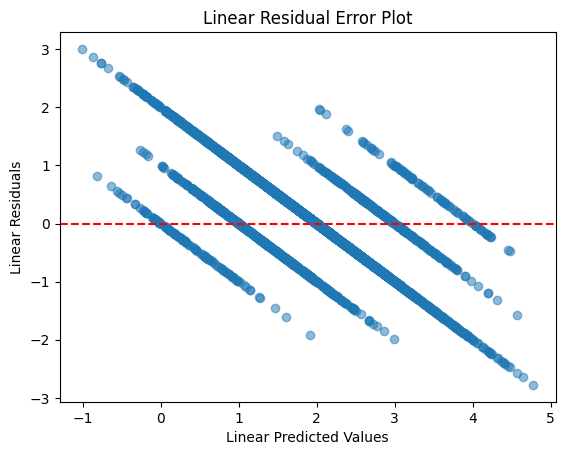

['lin_reg_model.pkl']

In [88]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred_linearregression = lin_reg.predict(X_test)

mae = mean_absolute_error(y_test, y_pred_linearregression)
mse = mean_squared_error(y_test, y_pred_linearregression)
r2 = r2_score(y_test, y_pred_linearregression)
residuals = y_test - y_pred_linearregression

print("MAE:", mae)
print("MSE:", mse)
print("R²:", r2)


plt.figure()
plt.scatter(y_pred_linearregression, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Linear Predicted Values")
plt.ylabel("Linear Residuals")
plt.title("Linear Residual Error Plot")
plt.show()

# Save Linear Regression model
joblib.dump(lin_reg, 'lin_reg_model.pkl')

## Ridge regression

Ridge Regression MAE: 0.6471994371014358
Ridge Regression MSE: 0.6741822998613604
Ridge Regression R²: -0.5448732494951252


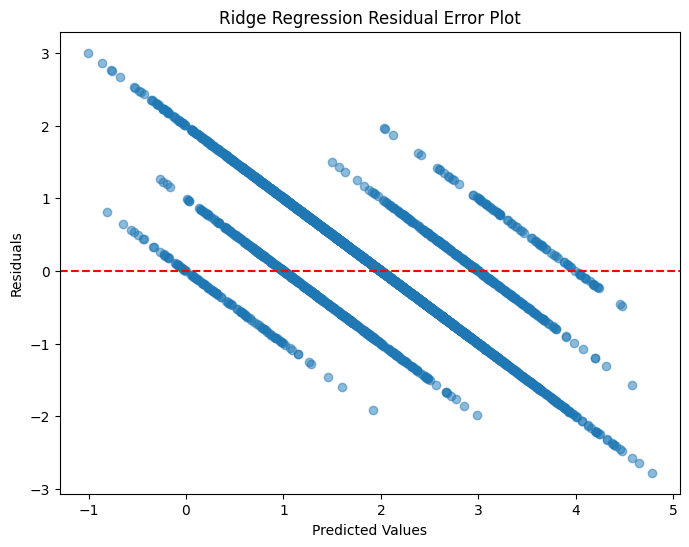

['ridge_reg_model.pkl']

In [77]:
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train, y_train)

y_pred_ridge = ridge_reg.predict(X_test)

mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
residuals_ridge = y_test - y_pred_ridge

print("Ridge Regression MAE:", mae_ridge)
print("Ridge Regression MSE:", mse_ridge)
print("Ridge Regression R²:", r2_ridge)

plt.figure(figsize=(8, 6))
plt.scatter(y_pred_ridge, residuals_ridge, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Ridge Regression Residual Error Plot")
plt.show()

# Save Ridge Regression model
joblib.dump(ridge_reg, 'ridge_reg_model.pkl')

## Laso regression

Lasso Regression MAE: 0.6067384508034684
Lasso Regression MSE: 0.5782964115607883
Lasso Regression R²: -0.32515293961737646


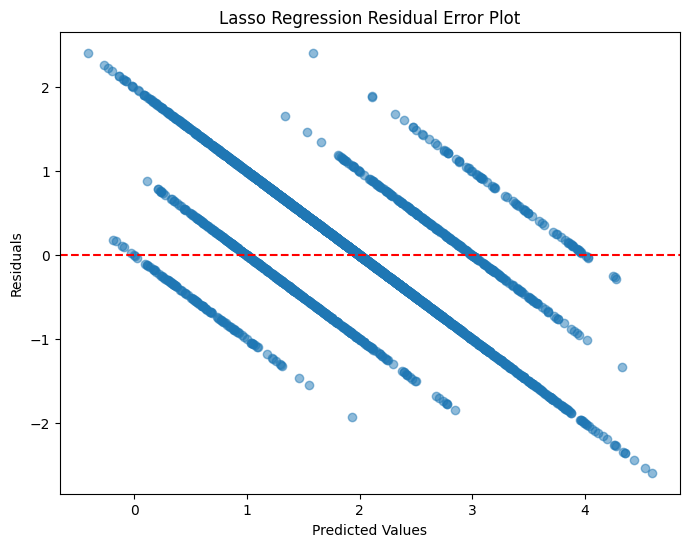

['lasso_reg_model.pkl']

In [78]:
lasso_reg = Lasso(alpha=0.1) # You can adjust the alpha (regularization strength) parameter
lasso_reg.fit(X_train, y_train)

y_pred_lasso = lasso_reg.predict(X_test)

mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
residuals_lasso = y_test - y_pred_lasso

print("Lasso Regression MAE:", mae_lasso)
print("Lasso Regression MSE:", mse_lasso)
print("Lasso Regression R²:", r2_lasso)

plt.figure(figsize=(8, 6))
plt.scatter(y_pred_lasso, residuals_lasso, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Lasso Regression Residual Error Plot")
plt.show()

# Save Lasso Regression model
joblib.dump(lasso_reg, 'lasso_reg_model.pkl')

## XGBRegressor

In [ ]:
xgb = XGBRegressor(
    objective='reg:squarederror',
    random_state=42
)

param_dist = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

xgb_search = RandomizedSearchCV(
    xgb,
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

xgb_search.fit(X_train, y_train)

print("Best XGB params:", xgb_search.best_params_)


KeyboardInterrupt: 

XGB Regression MAE: 0.6381803154945374
XGB Regression MSE: 0.6107779145240784
XGB Regression R²: -0.3995833396911621


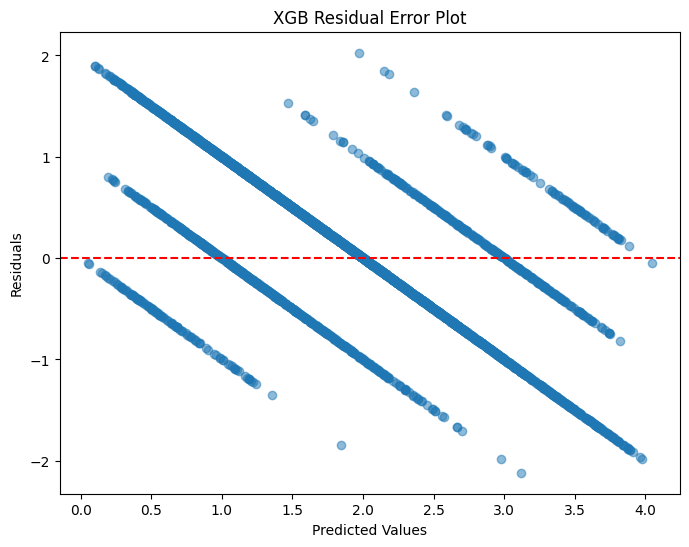

['y_test.pkl']

In [67]:
xgb_reg = XGBRegressor(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=3,
    subsample=1.0,
    colsample_bytree= 0.8,
    random_state=42
)

xgb_reg.fit(X_train, y_train)
y_pred_XGB = xgb_reg.predict(X_test)

mae_XGB = mean_absolute_error(y_test, y_pred_XGB)
mse_XGB = mean_squared_error(y_test, y_pred_XGB)
r2_XGB = r2_score(y_test, y_pred_XGB)
residuals_XGB = y_test - y_pred_XGB

print("XGB Regression MAE:", mae_XGB)
print("XGB Regression MSE:", mse_XGB)
print("XGB Regression R²:", r2_XGB)

plt.figure(figsize=(8, 6))
plt.scatter(y_pred_XGB, residuals_XGB, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("XGB Residual Error Plot")
plt.show()

# Save XGBoost model
joblib.dump(xgb_reg, 'xgb_reg_model.pkl')
joblib.dump(X_test, 'X_test.pkl')
joblib.dump(y_test, 'y_test.pkl')

## Random forest

In [ ]:
rf = RandomForestRegressor(random_state=202200341)

param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_search = RandomizedSearchCV(
    rf,
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

rf_search.fit(X_train, y_train)

print("Best RF params:", rf_search.best_params_)

Random Forest MAE: 0.54080125
Random Forest MSE: 0.42227484375
Random Forest R²: 0.032366898124941756


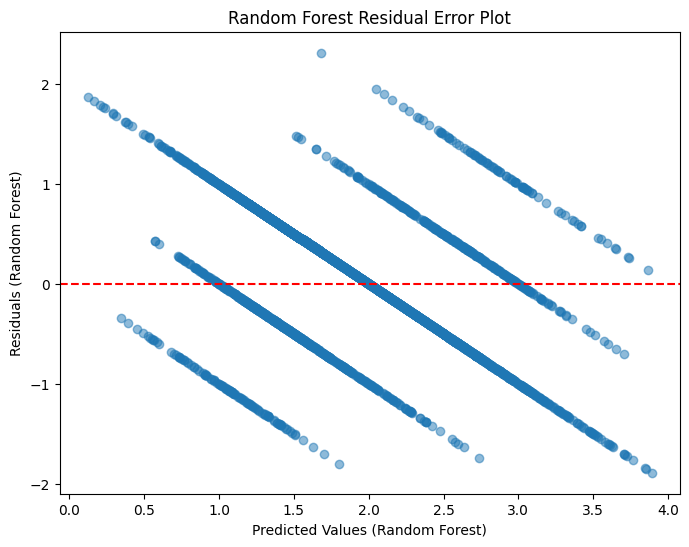

['rf_reg_model.pkl']

In [68]:
rf_reg = RandomForestRegressor(
    n_estimators=200,
    max_depth=None,
    random_state=42
)

rf_reg.fit(X_train, y_train)
y_pred_randomforestregg = rf_reg.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_randomforestregg)
mse_rf = mean_squared_error(y_test, y_pred_randomforestregg)
r2_rf = r2_score(y_test, y_pred_randomforestregg)
residuals_rf = y_test - y_pred_randomforestregg

print("Random Forest MAE:", mae_rf)
print("Random Forest MSE:", mse_rf)
print("Random Forest R²:", r2_rf)

plt.figure(figsize=(8, 6))
plt.scatter(y_pred_randomforestregg, residuals_rf, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Values (Random Forest)")
plt.ylabel("Residuals (Random Forest)")
plt.title("Random Forest Residual Error Plot")
plt.show()

# Save Random Forest Regression model
joblib.dump(rf_reg, 'rf_reg_model.pkl')

# Binary classification

In [ ]:
X_train, X_test, y_train, y_test = (X_train_balanced_pass, X_test_balanced_pass, y_train_balanced_pass, y_test_balanced_pass)

## Random forest

Training Accuracy: 1.0
Test Accuracy: 0.85

Classification Report (Test Set):
               precision    recall  f1-score   support

           0       0.72      0.75      0.73      1104
           1       0.90      0.89      0.90      2896

    accuracy                           0.85      4000
   macro avg       0.81      0.82      0.81      4000
weighted avg       0.85      0.85      0.85      4000


Confusion Matrix (Test Set):
 [[ 830  274]
 [ 326 2570]]


<Figure size 800x600 with 0 Axes>

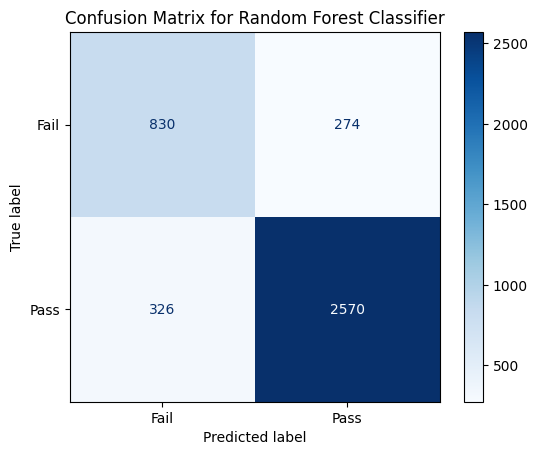

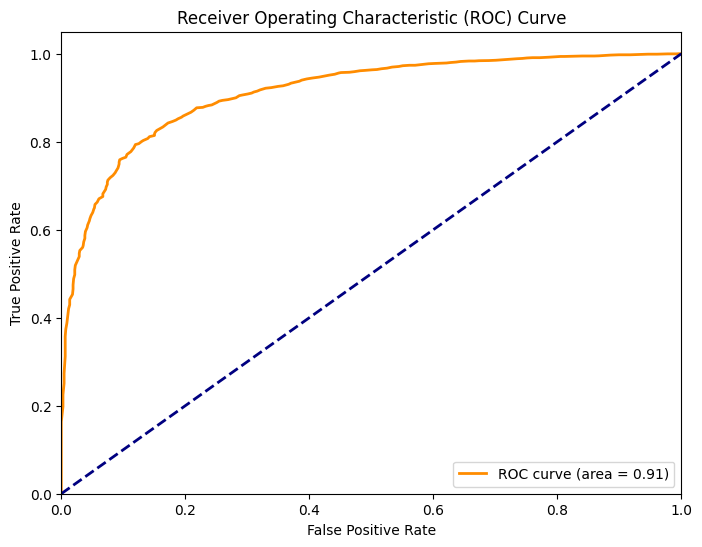

AUC Score: 0.9118527429137642


['y_test_balanced_pass.pkl']

In [80]:
rf_clf = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)

rf_clf.fit(X_train_balanced_pass, y_train_balanced_pass)

y_pred_train = rf_clf.predict(X_train_balanced_pass) # Predict on training data
y_pred_test = rf_clf.predict(X_test_balanced_pass) # Predict on test data
y_prob_test = rf_clf.predict_proba(X_test_balanced_pass)[:, 1] # Probabilities for ROC curve

print("Training Accuracy:", accuracy_score(y_train_balanced_pass, y_pred_train))
print("Test Accuracy:", accuracy_score(y_test_balanced_pass, y_pred_test))
print("\nClassification Report (Test Set):\n", classification_report(y_test_balanced_pass, y_pred_test, labels=[0, 1]))

# Confusion Matrix
cm = confusion_matrix(y_test_balanced_pass, y_pred_test, labels=[0, 1])
print("\nConfusion Matrix (Test Set):\n", cm)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Fail', 'Pass']).plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test_balanced_pass, y_prob_test)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print("AUC Score:", roc_auc)

# Save Random Forest Classifier model
joblib.dump(rf_clf, 'rf_clf_model.pkl')
joblib.dump(X_test_balanced_pass, 'X_test_balanced_pass.pkl')
joblib.dump(y_test_balanced_pass, 'y_test_balanced_pass.pkl')

## SVM

Training Accuracy: 0.9444492403314917
Test Accuracy: 0.84375

Classification Report (Test Set):
               precision    recall  f1-score   support

           0       0.70      0.77      0.73      1104
           1       0.91      0.87      0.89      2896

    accuracy                           0.84      4000
   macro avg       0.80      0.82      0.81      4000
weighted avg       0.85      0.84      0.85      4000


Confusion Matrix (Test Set):
 [[ 853  251]
 [ 374 2522]]


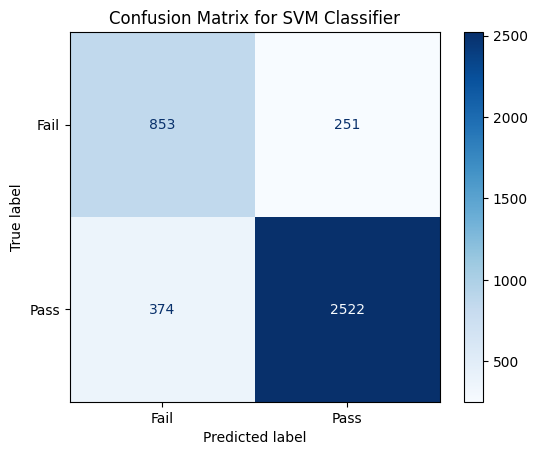

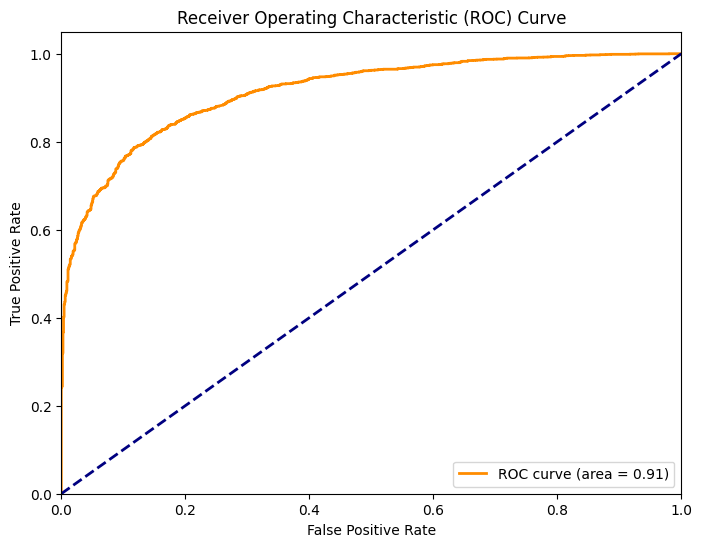

AUC Score: 0.9139886850428376


['svm_clf_model.pkl']

In [81]:
svm_clf = SVC(
    kernel='rbf',
    C=1,
    gamma='scale',
    probability=True # Needed for predict_proba to generate ROC curve
)

svm_clf.fit(X_train_balanced_pass, y_train_balanced_pass)

y_pred_train = svm_clf.predict(X_train_balanced_pass) # Predict on training data
y_pred_test = svm_clf.predict(X_test_balanced_pass) # Predict on test data
y_prob_test = svm_clf.predict_proba(X_test_balanced_pass)[:, 1] # Probabilities for ROC curve

print("Training Accuracy:", accuracy_score(y_train_balanced_pass, y_pred_train))
print("Test Accuracy:", accuracy_score(y_test_balanced_pass, y_pred_test))
print("\nClassification Report (Test Set):\n", classification_report(y_test_balanced_pass, y_pred_test, labels=[0, 1]))

# Confusion Matrix
cm = confusion_matrix(y_test_balanced_pass, y_pred_test, labels=[0, 1])
print("\nConfusion Matrix (Test Set):\n", cm)

# Plot Confusion Matrix
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Fail', 'Pass']).plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for SVM Classifier')
plt.show()

# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test_balanced_pass, y_prob_test)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print("AUC Score:", roc_auc)

# Save SVM model
joblib.dump(svm_clf, 'svm_clf_model.pkl')

## Logistic regression

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(


Training Accuracy: 0.8684823895027625
Test Accuracy: 0.845

Classification Report (Test Set):
               precision    recall  f1-score   support

           0       0.67      0.85      0.75      1104
           1       0.94      0.84      0.89      2896

    accuracy                           0.84      4000
   macro avg       0.81      0.85      0.82      4000
weighted avg       0.86      0.84      0.85      4000


Confusion Matrix (Test Set):
 [[ 943  161]
 [ 459 2437]]


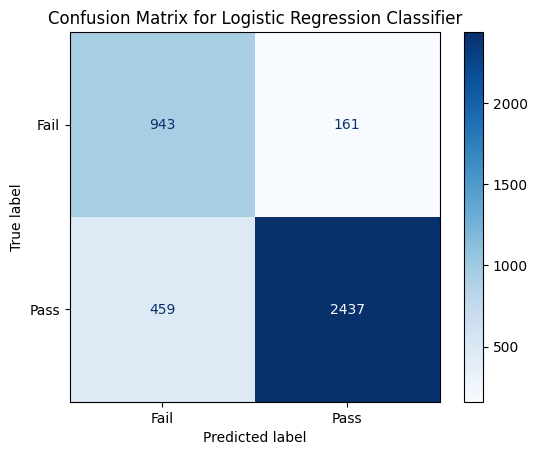

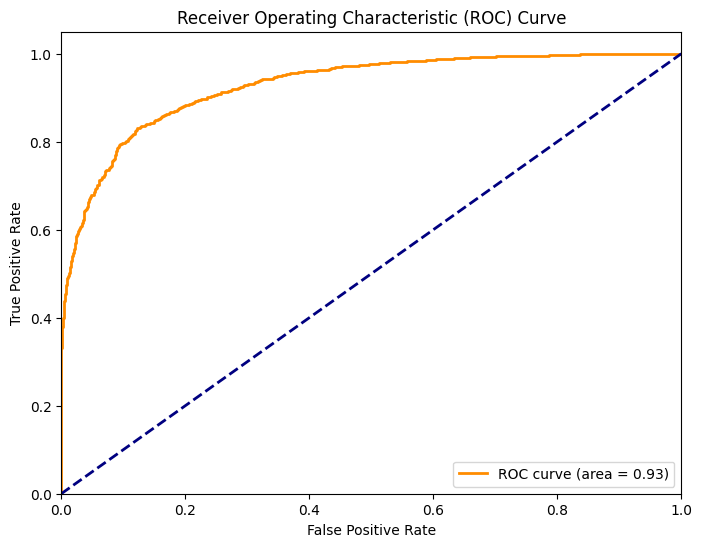

AUC Score: 0.9283625840739851


['log_reg_model.pkl']

In [83]:
log_reg = LogisticRegression(
    multi_class='multinomial',
    solver='lbfgs',
    max_iter=5000
)

log_reg.fit(X_train_balanced_pass, y_train_balanced_pass)

y_pred_train_logistic = log_reg.predict(X_train_balanced_pass)
y_pred_test_logistic = log_reg.predict(X_test_balanced_pass)
y_prob_test_logostic = log_reg.predict_proba(X_test_balanced_pass)[:, 1] # Probabilities for ROC curve

print("Training Accuracy:", accuracy_score(y_train_balanced_pass, y_pred_train_logistic))
print("Test Accuracy:", accuracy_score(y_test_balanced_pass, y_pred_test_logistic))
print("\nClassification Report (Test Set):\n", classification_report(y_test_balanced_pass, y_pred_test_logistic, labels=[0, 1]))

# Confusion Matrix
cm = confusion_matrix(y_test_balanced_pass, y_pred_test_logistic, labels=[0, 1])
print("\nConfusion Matrix (Test Set):\n", cm)

# Plot Confusion Matrix
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Fail', 'Pass']).plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Logistic Regression Classifier')
plt.show()

# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test_balanced_pass, y_prob_test_logostic)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print("AUC Score:", roc_auc)

# Save Logistic Regression model
joblib.dump(log_reg, 'log_reg_model.pkl')

## Knn

Training Accuracy: 1.0
Test Accuracy: 0.587

Confusion Matrix (Test Set):
 [[ 987  117]
 [1535 1361]]

Classification Report (Test Set):
               precision    recall  f1-score   support

           0       0.39      0.89      0.54      1104
           1       0.92      0.47      0.62      2896

    accuracy                           0.59      4000
   macro avg       0.66      0.68      0.58      4000
weighted avg       0.77      0.59      0.60      4000



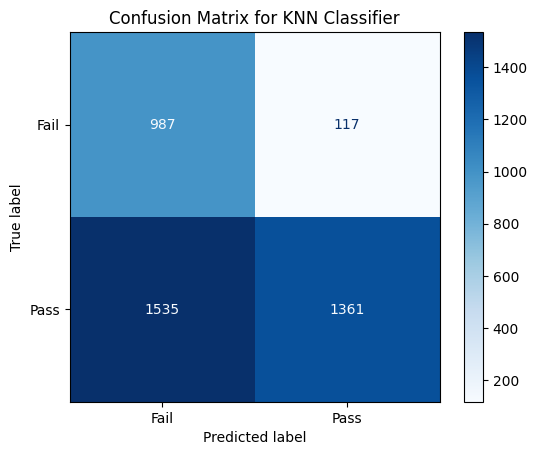

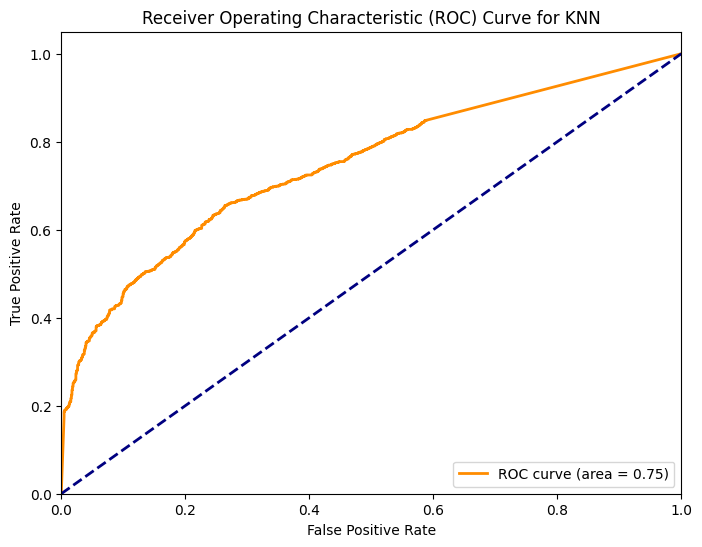

AUC Score: 0.7462357499599648


['knn_model.pkl']

In [84]:
knn = KNeighborsClassifier(
    n_neighbors=5,
    weights="distance",
    metric="euclidean"
)

knn.fit(X_train_balanced_pass, y_train_balanced_pass)

y_pred_train_knn = knn.predict(X_train_balanced_pass)
y_pred_test_knn = knn.predict(X_test_balanced_pass)
y_prob_test_knn = knn.predict_proba(X_test_balanced_pass)[:, 1] # Probabilities for ROC curve

print("Training Accuracy:", accuracy_score(y_train_balanced_pass, y_pred_train_knn))
print("Test Accuracy:", accuracy_score(y_test_balanced_pass, y_pred_test_knn))
print("\nConfusion Matrix (Test Set):\n", confusion_matrix(y_test_balanced_pass, y_pred_test_knn, labels=[0, 1]))
print("\nClassification Report (Test Set):\n", classification_report(y_test_balanced_pass, y_pred_test_knn, labels=[0, 1]))

# Confusion Matrix
cm = confusion_matrix(y_test_balanced_pass, y_pred_test_knn, labels=[0, 1])
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Fail', 'Pass']).plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for KNN Classifier')
plt.show()

# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test_balanced_pass, y_prob_test_knn)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for KNN')
plt.legend(loc="lower right")
plt.show()

print("AUC Score:", roc_auc)

# Save KNN model
joblib.dump(knn, 'knn_model.pkl')

## decision tree

Training Accuracy: 0.8628280386740331
Test Accuracy: 0.82

Classification Report (Test Set):
               precision    recall  f1-score   support

           0       0.63      0.83      0.72      1104
           1       0.93      0.82      0.87      2896

    accuracy                           0.82      4000
   macro avg       0.78      0.82      0.79      4000
weighted avg       0.84      0.82      0.83      4000


Confusion Matrix (Test Set):
 [[ 913  191]
 [ 529 2367]]


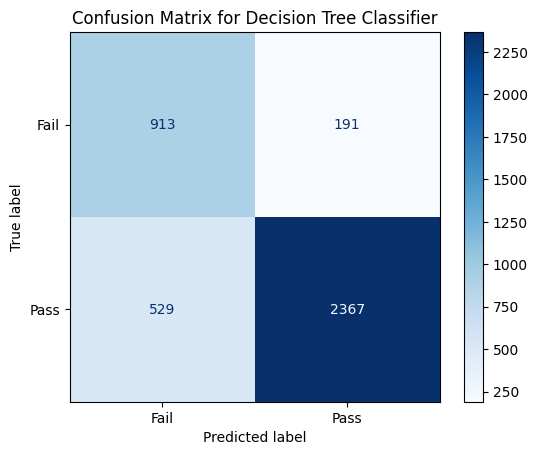

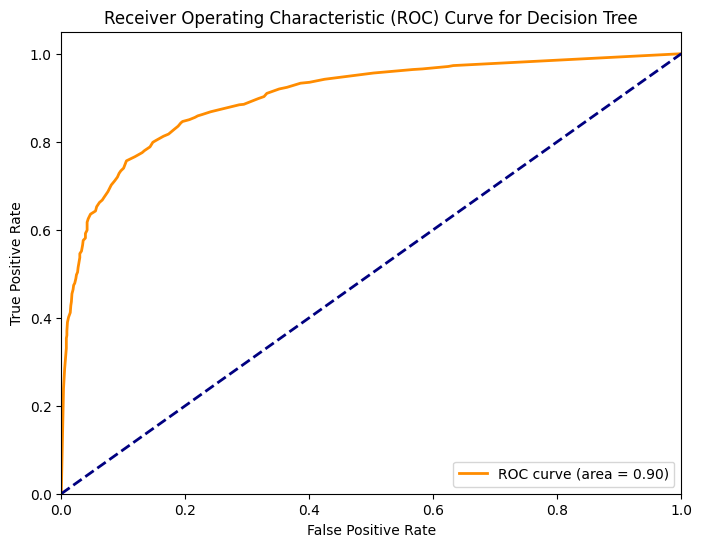

AUC Score: 0.9012043097926175


['dt_clf_model.pkl']

In [85]:
dt_clf = DecisionTreeClassifier(
    random_state=202200341,
    max_depth=7,
    min_samples_split=200,
    min_samples_leaf=100,
    max_features=None
)
dt_clf.fit(X_train_balanced_pass, y_train_balanced_pass)

y_pred_train_dt = dt_clf.predict(X_train_balanced_pass)
y_pred_test_dt = dt_clf.predict(X_test_balanced_pass)
y_prob_test_dt = dt_clf.predict_proba(X_test_balanced_pass)[:, 1] # Probabilities for ROC curve

print("Training Accuracy:", accuracy_score(y_train_balanced_pass, y_pred_train_dt))
print("Test Accuracy:", accuracy_score(y_test_balanced_pass, y_pred_test_dt))
print("\nClassification Report (Test Set):\n", classification_report(y_test_balanced_pass, y_pred_test_dt, labels=[0, 1]))

# Confusion Matrix
cm = confusion_matrix(y_test_balanced_pass, y_pred_test_dt, labels=[0, 1])
print("\nConfusion Matrix (Test Set):\n", cm)

# Plot Confusion Matrix
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Fail', 'Pass']).plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test_balanced_pass, y_prob_test_dt)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Decision Tree')
plt.legend(loc="lower right")
plt.show()

print("AUC Score:", roc_auc)

# Save Decision Tree Classifier model
joblib.dump(dt_clf, 'dt_clf_model.pkl')

# Multi classification


In [ ]:
X_train, X_test, y_train, y_test = (X_train_balanced_grade, X_test_balanced_grade, y_train_balanced_grade, y_test_balanced_grade)
class_labels = ['F', 'D', 'C', 'B', 'A']

## Hyperparameter Tuning for Decision Tree (to reduce overfitting)

In [ ]:
dt_clf_tuned = DecisionTreeClassifier(random_state=202200341)

param_dist_dt = {
    'max_depth': [5, 10, 15, 20, None], # None means no limit on depth
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'criterion': ['gini', 'entropy']
}

dt_search = RandomizedSearchCV(
    dt_clf_tuned,
    param_distributions=param_dist_dt,
    n_iter=20, # Number of parameter settings that are sampled
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=202200341
)

dt_search.fit(X_train, y_train)

print("Best Decision Tree params:", dt_search.best_params_)

Best Decision Tree params: {'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 20, 'criterion': 'entropy'}



Training Accuracy (Tuned DT): 0.9866678438989934
Test Accuracy (Tuned DT): 0.473

Classification Report (Tuned DT Test Set):
               precision    recall  f1-score   support

           0       0.17      0.38      0.24       119
           1       0.25      0.39      0.31       650
           2       0.73      0.51      0.60      2832
           3       0.20      0.37      0.26       312
           4       0.12      0.26      0.17        87

    accuracy                           0.47      4000
   macro avg       0.30      0.38      0.32      4000
weighted avg       0.58      0.47      0.51      4000


Confusion Matrix (Tuned DT Test Set):
 [[  45   33   40    1    0]
 [  64  256  304   25    1]
 [ 149  704 1454  394  131]
 [   0   16  152  114   30]
 [   0    1   33   30   23]]


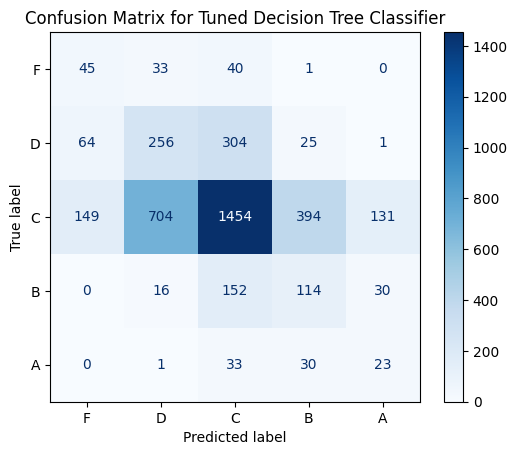

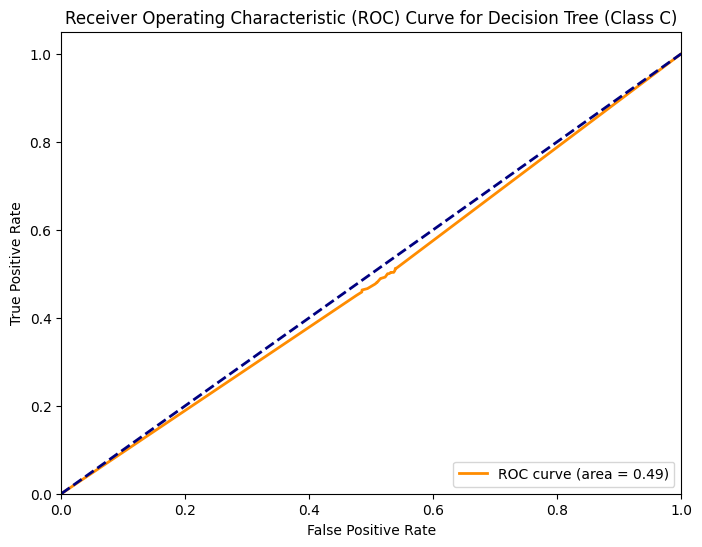

AUC Score: 0.485753616532721


In [ ]:
y_pred_train_dt_tuned = dt_search.best_estimator_.predict(X_train)
y_pred_test_dt_tuned = dt_search.best_estimator_.predict(X_test)
y_prob_test_dt_tuned = dt_search.best_estimator_.predict_proba(X_test)

print("\nTraining Accuracy (Tuned DT):", accuracy_score(y_train, y_pred_train_dt_tuned))
print("Test Accuracy (Tuned DT):", accuracy_score(y_test, y_pred_test_dt_tuned))
print("\nClassification Report (Tuned DT Test Set):\n", classification_report(y_test, y_pred_test_dt_tuned))

cm_tuned = confusion_matrix(y_test, y_pred_test_dt_tuned)
print("\nConfusion Matrix (Tuned DT Test Set):\n", cm_tuned)

ConfusionMatrixDisplay(confusion_matrix=cm_tuned, display_labels=class_labels).plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Tuned Decision Tree Classifier')
plt.show()

# ROC Curve and AUC (For multiclass, a common approach is One-vs-Rest for each class.
# We will calculate for Class 1 (grade 'D') as an example, similar to the Decision Tree multiclass cell.)
fpr, tpr, thresholds = roc_curve(y_test, y_prob_test_dt_tuned[:, 2], pos_label=1)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Decision Tree (Class C)')
plt.legend(loc="lower right")
plt.show()

print("AUC Score:", roc_auc)

## logistic regression


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Training Accuracy: 0.6741126611336747
Test Accuracy: 0.42

Classification Report (Test Set):
               precision    recall  f1-score   support

           0       0.19      0.75      0.31       119
           1       0.31      0.53      0.39       650
           2       0.80      0.36      0.50      2832
           3       0.21      0.55      0.30       312
           4       0.16      0.57      0.25        87

    accuracy                           0.42      4000
   macro avg       0.33      0.55      0.35      4000
weighted avg       0.64      0.42      0.45      4000


Confusion Matrix (Test Set):
 [[  89   28    2    0    0]
 [  98  345  190   17    0]
 [ 272  747 1023  601  189]
 [   0    3   65  173   71]
 [   0    0    5   32   50]]


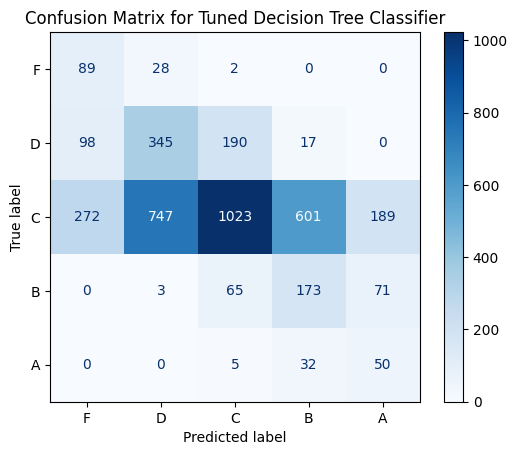

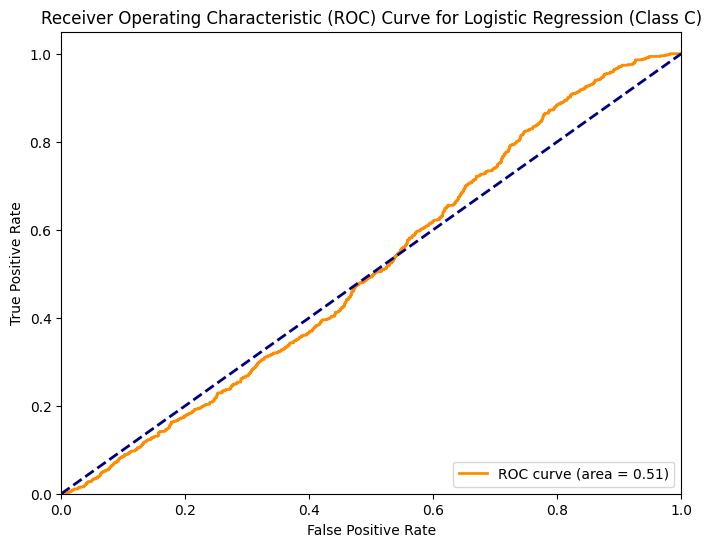

AUC Score: 0.5112385763490241


In [ ]:
log_reg = LogisticRegression(
    multi_class='multinomial',
    solver='lbfgs',
    max_iter=2000
)

log_reg.fit(X_train, y_train)

y_pred_train_logistic_multiclass = log_reg.predict(X_train)
y_pred_test_logistic_multiclass = log_reg.predict(X_test)
y_prob_test_logistic_multiclass = log_reg.predict_proba(X_test) # Probabilities for each class

print("Training Accuracy:", accuracy_score(y_train, y_pred_train_logistic_multiclass))
print("Test Accuracy:", accuracy_score(y_test, y_pred_test_logistic_multiclass))
print("\nClassification Report (Test Set):\n", classification_report(y_test, y_pred_test_logistic_multiclass))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_test_logistic_multiclass)
print("\nConfusion Matrix (Test Set):\n", cm)

ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels).plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Tuned Decision Tree Classifier')
plt.show()

# ROC Curve and AUC (For multiclass, a common approach is One-vs-Rest for each class.
# We will calculate for Class 1 (grade 'D') as an example, similar to the Decision Tree multiclass cell.)
fpr, tpr, thresholds = roc_curve(y_test, y_prob_test_logistic_multiclass[:, 2], pos_label=1)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Logistic Regression (Class C)')
plt.legend(loc="lower right")
plt.show()

print("AUC Score:", roc_auc)

## decision tree


Training Accuracy: 1.0
Test Accuracy: 0.46575

Classification Report (Test Set):
               precision    recall  f1-score   support

           0       0.15      0.29      0.19       119
           1       0.25      0.36      0.29       650
           2       0.72      0.52      0.60      2832
           3       0.18      0.35      0.24       312
           4       0.10      0.21      0.13        87

    accuracy                           0.47      4000
   macro avg       0.28      0.34      0.29      4000
weighted avg       0.57      0.47      0.50      4000


Confusion Matrix (Test Set):
 [[  34   39   45    1    0]
 [  47  235  342   25    1]
 [ 150  663 1468  430  121]
 [   0   15  140  108   49]
 [   0    3   35   31   18]]


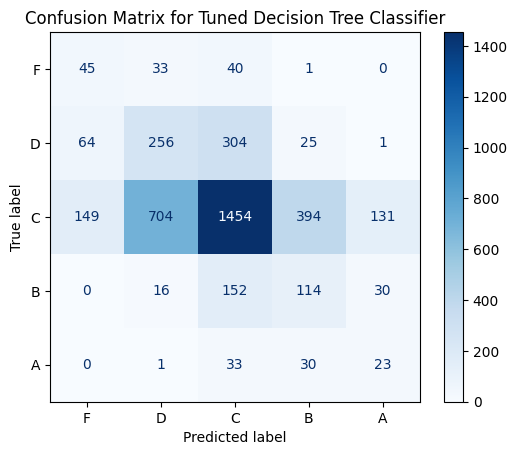

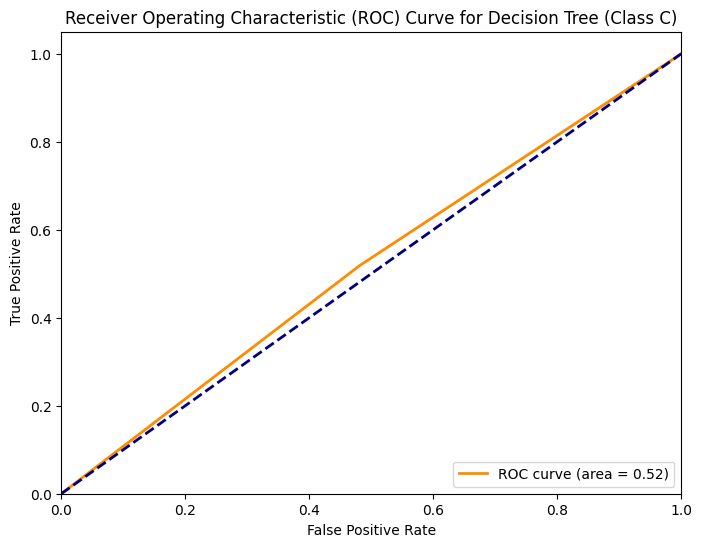

AUC Score: 0.5185985991796301


In [ ]:
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)

y_pred_train_dt_multi = dt_clf.predict(X_train)
y_pred_test_dt_multi = dt_clf.predict(X_test)
y_prob_test_dt_multi = dt_clf.predict_proba(X_test) # Probabilities for each class

print("Training Accuracy:", accuracy_score(y_train, y_pred_train_dt_multi))
print("Test Accuracy:", accuracy_score(y_test, y_pred_test_dt_multi))
print("\nClassification Report (Test Set):\n", classification_report(y_test, y_pred_test_dt_multi))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_test_dt_multi)
print("\nConfusion Matrix (Test Set):\n", cm)

ConfusionMatrixDisplay(confusion_matrix=cm_tuned, display_labels=class_labels).plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Tuned Decision Tree Classifier')
plt.show()

# ROC Curve and AUC (For multiclass, we'll calculate for a specific class using one-vs-rest.
# Assuming 'C' grade (mapped to 2) as the positive class for example ROC)
fpr, tpr, thresholds = roc_curve(y_test, y_prob_test_dt_multi[:, 2], pos_label=2)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Decision Tree (Class C)')
plt.legend(loc="lower right")
plt.show()

print("AUC Score:", roc_auc)

## svm

Training Accuracy: 0.9669609747483666
Test Accuracy: 0.61125

Classification Report (Test Set):
               precision    recall  f1-score   support

           0       0.31      0.35      0.33       119
           1       0.27      0.24      0.25       650
           2       0.73      0.77      0.75      2832
           3       0.23      0.18      0.20       312
           4       0.21      0.16      0.18        87

    accuracy                           0.61      4000
   macro avg       0.35      0.34      0.34      4000
weighted avg       0.59      0.61      0.60      4000


Confusion Matrix (Test Set):
 [[  42   29   48    0    0]
 [  23  153  470    4    0]
 [  71  376 2179  165   41]
 [   0    4  240   57   11]
 [   0    0   52   21   14]]


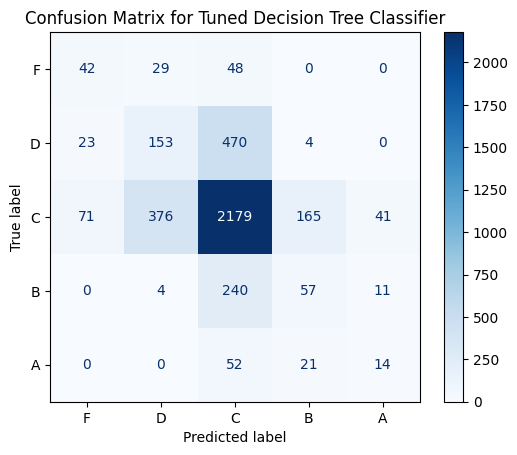

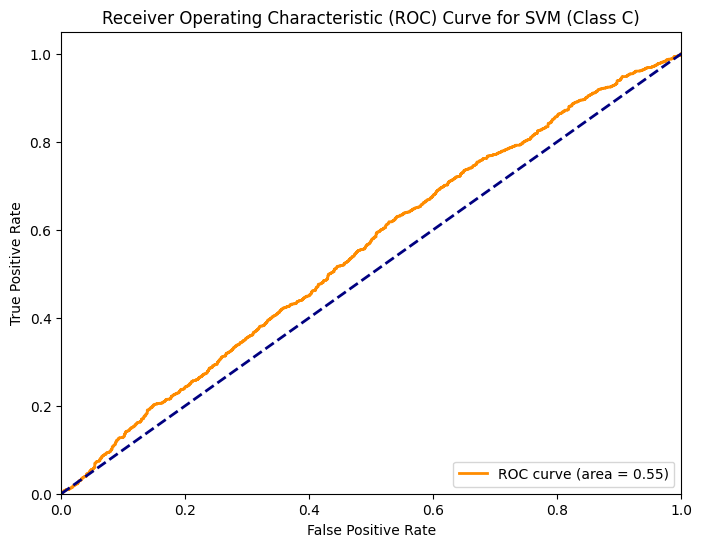

AUC Score: 0.5512843070389288


In [ ]:
svm_clf = SVC(
    kernel='rbf',
    C=1,
    gamma='scale',
    probability=True # Needed for predict_proba to generate ROC curve
)

svm_clf.fit(X_train, y_train)

y_pred_train_svm_multi = svm_clf.predict(X_train) # Predict on training data
y_pred_test_svm_multi = svm_clf.predict(X_test) # Predict on test data
y_prob_test_svm_multi = svm_clf.predict_proba(X_test) # Probabilities for each class

print("Training Accuracy:", accuracy_score(y_train, y_pred_train_svm_multi))
print("Test Accuracy:", accuracy_score(y_test, y_pred_test_svm_multi))
print("\nClassification Report (Test Set):\n", classification_report(y_test, y_pred_test_svm_multi))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_test_svm_multi)
print("\nConfusion Matrix (Test Set):\n", cm)

ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels).plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Tuned Decision Tree Classifier')
plt.show()

# ROC Curve and AUC (For multiclass, we'll calculate for a specific class using one-vs-rest)
# Assuming 'C' grade (mapped to 2) as the positive class for example ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob_test_svm_multi[:, 2], pos_label=2)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for SVM (Class C)')
plt.legend(loc="lower right")
plt.show()

print("AUC Score:", roc_auc)

## random forest

Training Accuracy: 1.0
Test Accuracy: 0.6315

Classification Report (Test Set):
               precision    recall  f1-score   support

           0       0.33      0.29      0.31       119
           1       0.31      0.26      0.28       650
           2       0.74      0.79      0.76      2832
           3       0.28      0.23      0.25       312
           4       0.23      0.24      0.24        87

    accuracy                           0.63      4000
   macro avg       0.38      0.36      0.37      4000
weighted avg       0.61      0.63      0.62      4000


Confusion Matrix (Test Set):
 [[  35   30   54    0    0]
 [  14  166  468    2    0]
 [  57  330 2233  158   54]
 [   0    1  225   71   15]
 [   0    0   46   20   21]]


<Figure size 800x600 with 0 Axes>

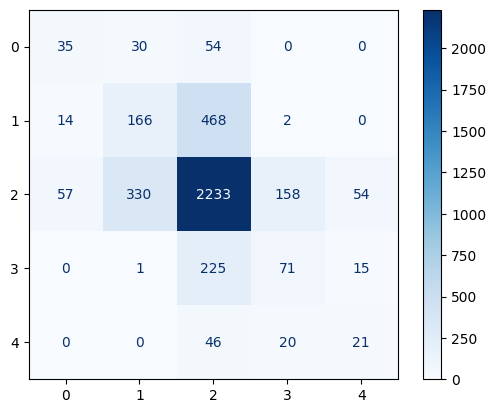

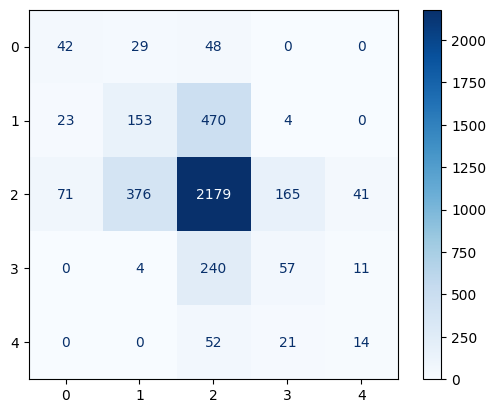

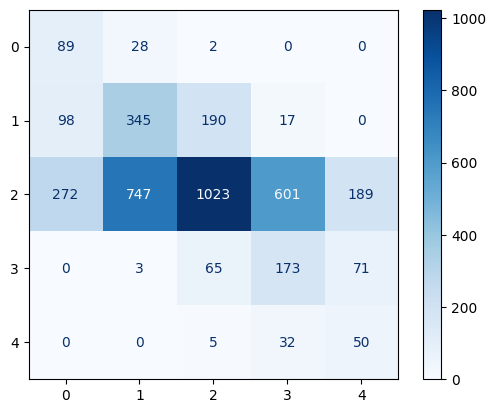

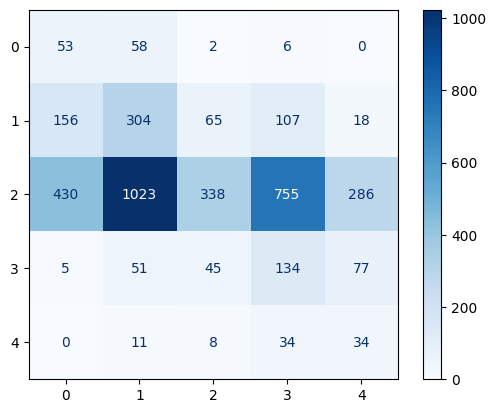

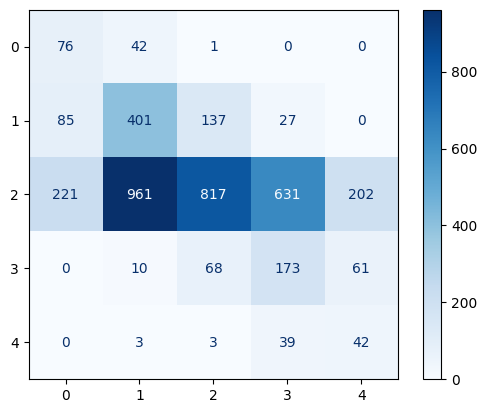

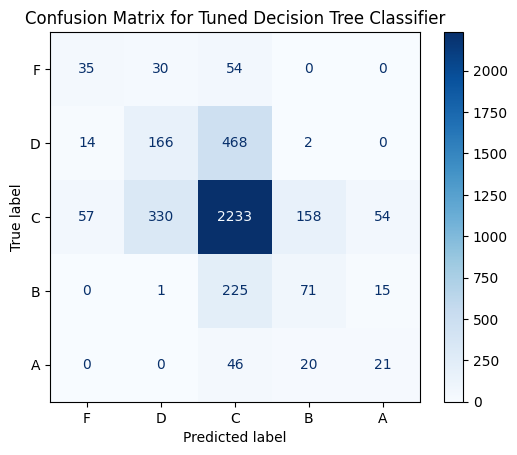

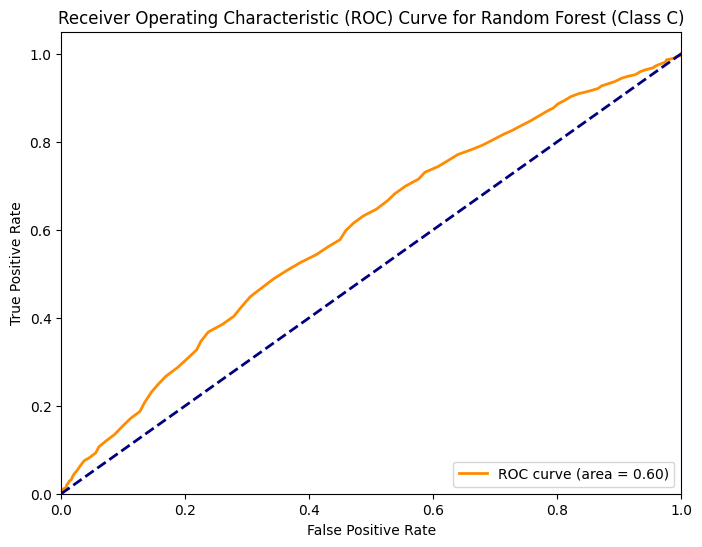

AUC Score: 0.5962297628376287


['y_test_balanced_grade.pkl']

In [74]:
rf_clf_multiclass = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)

rf_clf_multiclass.fit(X_train, y_train)

y_pred_train_rf_multiclass = rf_clf_multiclass.predict(X_train) # Predict on training data
y_pred_test_rf_multiclass = rf_clf_multiclass.predict(X_test) # Predict on test data
y_prob_test_rf_multiclass = rf_clf_multiclass.predict_proba(X_test) # Probabilities for each class

print("Training Accuracy:", accuracy_score(y_train, y_pred_train_rf_multiclass))
print("Test Accuracy:", accuracy_score(y_test, y_pred_test_rf_multiclass))
print("\nClassification Report (Test Set):\n", classification_report(y_test, y_pred_test_rf_multiclass))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_test_rf_multiclass)
print("\nConfusion Matrix (Test Set):\n", cm)

ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels).plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Tuned Decision Tree Classifier')
plt.show()

# ROC Curve and AUC (For multiclass, we'll calculate for a specific class using one-vs-rest)
# Assuming 'C' grade (mapped to 2) as the positive class for example ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob_test_rf_multiclass[:, 2], pos_label=2)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Random Forest (Class C)')
plt.legend(loc="lower right")
plt.show()

print("AUC Score:", roc_auc)

# Save Random Forest Multiclass model
joblib.dump(rf_clf_multiclass, 'rf_clf_multiclass_model.pkl')
joblib.dump(X_test_balanced_grade, 'X_test_balanced_grade.pkl')
joblib.dump(y_test_balanced_grade, 'y_test_balanced_grade.pkl')

## gradient boasting

Training Accuracy: 0.8220377891576903
Test Accuracy: 0.62025

Classification Report (Test Set):
               precision    recall  f1-score   support

           0       0.25      0.53      0.34       119
           1       0.30      0.17      0.22       650
           2       0.74      0.79      0.76      2832
           3       0.26      0.15      0.19       312
           4       0.20      0.43      0.27        87

    accuracy                           0.62      4000
   macro avg       0.35      0.41      0.35      4000
weighted avg       0.60      0.62      0.60      4000


Confusion Matrix (Test Set):
 [[  63    9   47    0    0]
 [  50  109  488    3    0]
 [ 136  239 2226  117  114]
 [   0    2  226   46   38]
 [   0    1   39   10   37]]


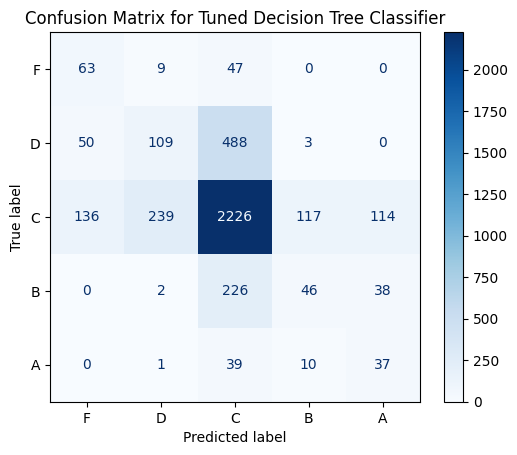

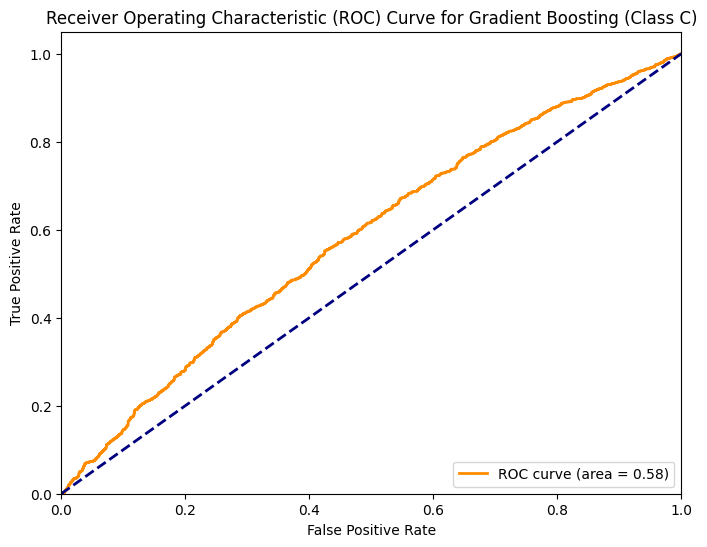

AUC Score: 0.5821158990209737


['gbc_clf_model.pkl']

In [75]:
gbc_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbc_clf.fit(X_train, y_train)

y_pred_train_gbc = gbc_clf.predict(X_train)
y_pred_test_gbc = gbc_clf.predict(X_test)
y_prob_test_gbc = gbc_clf.predict_proba(X_test) # Probabilities for each class

print("Training Accuracy:", accuracy_score(y_train, y_pred_train_gbc))
print("Test Accuracy:", accuracy_score(y_test, y_pred_test_gbc))
print("\nClassification Report (Test Set):\n", classification_report(y_test, y_pred_test_gbc))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_test_gbc)
print("\nConfusion Matrix (Test Set):\n", cm)

ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels).plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Tuned Decision Tree Classifier')
plt.show()

# ROC Curve and AUC (For multiclass, we'll calculate for a specific class using one-vs-rest)
# Assuming 'C' grade (mapped to 2) as the positive class for example ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob_test_gbc[:, 2], pos_label=2)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Gradient Boosting (Class C)')
plt.legend(loc="lower right")
plt.show()

print("AUC Score:", roc_auc)

# Save Gradient Boosting Classifier model
joblib.dump(gbc_clf, 'gbc_clf_model.pkl')

# Multilayer Precepton

In [ ]:
from sklearn.neural_network import MLPClassifier


mlp_clf = MLPClassifier(
    hidden_layer_sizes=(128, 64),
    activation='relu',
    solver='adam',
    alpha=0.0001,
    batch_size='auto',
    learning_rate='adaptive',
    max_iter=500,
    random_state=202200341,
    verbose=True
)

mlp_clf.fit(X_train, y_train)

y_pred_train_mlp = mlp_clf.predict(X_train)
y_pred_test_mlp = mlp_clf.predict(X_test)
y_prob_test_mlp = mlp_clf.predict_proba(X_test)

print("Training Accuracy:", accuracy_score(y_train, y_pred_train_mlp))
print("Test Accuracy:", accuracy_score(y_test, y_pred_test_mlp))

cm_mlp = confusion_matrix(y_test, y_pred_test_mlp)
print("\nConfusion Matrix (Test Set):\n", cm_mlp)
ConfusionMatrixDisplay(confusion_matrix=cm_mlp, display_labels=class_labels).plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for MLP Classifier')
plt.show()

fpr, tpr, thresholds = roc_curve(y_test, y_prob_test_mlp[:, 2], pos_label=2)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for MLP Classifier (Class C)')
plt.legend(loc="lower right")
plt.show()
print("AUC Score (Class C):", roc_auc)

# Bonus

In [86]:
%%writefile app.py

import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error, r2_score,
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_curve, auc
)

st.set_page_config(page_title="Student Performance Dashboard", layout="wide")

st.title("🎓 Student Performance Prediction Dashboard")
st.markdown("Compare Regression (Score), Binary (Pass/Fail), and Multiclass (Grades) models.")

# Load models and test data
try:
    lin_reg = joblib.load('lin_reg_model.pkl')
    ridge_reg = joblib.load('ridge_reg_model.pkl')
    lasso_reg = joblib.load('lasso_reg_model.pkl')
    rf_reg = joblib.load('rf_reg_model.pkl')
    xgb_reg = joblib.load('xgb_reg_model.pkl')

    log_reg = joblib.load('log_reg_model.pkl')
    knn = joblib.load('knn_model.pkl')
    svm_clf = joblib.load('svm_clf_model.pkl')
    dt_clf = joblib.load('dt_clf_model.pkl')
    rf_clf = joblib.load('rf_clf_model.pkl')
    gbc_clf = joblib.load('gbc_clf_model.pkl')
    rf_clf_multiclass = joblib.load('rf_clf_multiclass_model.pkl')

    X_test = joblib.load('X_test.pkl')
    y_test = joblib.load('y_test.pkl')
    X_test_balanced_pass = joblib.load('X_test_balanced_pass.pkl')
    y_test_balanced_pass = joblib.load('y_test_balanced_pass.pkl')
    X_test_balanced_grade = joblib.load('X_test_balanced_grade.pkl')
    y_test_balanced_grade = joblib.load('y_test_balanced_grade.pkl')
except FileNotFoundError:
    st.error("Model or test data files not found. Please ensure they are saved in the Colab notebook.")
    st.stop()

# Define class_labels for multiclass classification
class_labels = ['F', 'D', 'C', 'B', 'A']

# ======================================================
#  1. REGRESSION MODELS
# ======================================================
reg_models = {
    "Linear Regression": lin_reg,
    "Ridge Regression": ridge_reg,
    "Lasso Regression": lasso_reg,
    "Random Forest": rf_reg,
    "XGBoost": xgb_reg
}

reg_results = {}

for name, model in reg_models.items():
    y_pred = model.predict(X_test)
    reg_results[name] = {
        "MAE": mean_absolute_error(y_test, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
        "R2 Score": r2_score(y_test, y_pred)
    }

reg_df = pd.DataFrame(reg_results).T

# ======================================================
#  2. BINARY CLASSIFICATION MODELS
# ======================================================
bin_models = {
    "Logistic Regression": log_reg,
    "KNN": knn,
    "SVM": svm_clf,
    "Decision Tree": dt_clf,
    "Random Forest": rf_clf,
    "Gradient Boosting": gbc_clf
}

bin_results = {}

for name, model in bin_models.items():
    y_pred = model.predict(X_test_balanced_pass)
    bin_results[name] = {
        "Accuracy": accuracy_score(y_test_balanced_pass, y_pred),
        "Precision": precision_score(y_test_balanced_pass, y_pred, average='weighted'),
        "Recall": recall_score(y_test_balanced_pass, y_pred, average='weighted'),
        "F1 Score": f1_score(y_test_balanced_pass, y_pred, average='weighted')
    }

bin_df = pd.DataFrame(bin_results).T

# ======================================================
#  3. MULTICLASS CLASSIFICATION MODELS
# ======================================================
multi_models = {
    "KNN": knn,
    "SVM": svm_clf,
    "Decision Tree": dt_clf,
    "Random Forest": rf_clf_multiclass,
    "Gradient Boosting": gbc_clf
}

multi_results = {}

for name, model in multi_models.items():
    y_pred = model.predict(X_test_balanced_grade)
    multi_results[name] = {
        "Accuracy": accuracy_score(y_test_balanced_grade, y_pred),
        "Precision": precision_score(y_test_balanced_grade, y_pred, average="weighted"),
        "Recall": recall_score(y_test_balanced_grade, y_pred, average="weighted"),
        "F1 Score": f1_score(y_test_balanced_grade, y_pred, average="weighted")
    }

multi_df = pd.DataFrame(multi_results).T

# ======================================================
#  DASHBOARD TABS
# ======================================================

tab1, tab2, tab3 = st.tabs(["📈 Regression Analysis", "⚖️ Pass/Fail (Binary)", "📊 Grade (Multiclass)"])

# ---------- TAB 1: REGRESSION ----------
with tab1:
    col1, col2 = st.columns([1, 2])

    with col1:
        st.subheader("Model Performance")
        st.dataframe(reg_df.style.highlight_max(axis=0, color='lightgreen'))
        best_reg = reg_df["R2 Score"].idxmax()
        st.success(f"🏆 Best Model: **{best_reg}**")

    with col2:
        st.subheader("Actual vs Predicted Comparison")
        model_option = st.selectbox("Select Regression Model", reg_models.keys())

        # Plotting
        selected_model = reg_models[model_option]
        y_pred_reg = selected_model.predict(X_test)

        fig, ax = plt.subplots(figsize=(8, 4))
        sns.scatterplot(x=y_test, y=y_pred_reg, alpha=0.6, color='blue', ax=ax)
        ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
        ax.set_xlabel("Actual Score")
        ax.set_ylabel("Predicted Score")
        ax.set_title(f"Linearity Check: {model_option}")
        st.pyplot(fig)

# ---------- TAB 2: BINARY CLASSIFICATION ----------
with tab2:
    col1, col2 = st.columns([1, 1])

    with col1:
        st.subheader("Performance Metrics")
        st.dataframe(bin_df.style.highlight_max(axis=0, color='lightgreen'))

        # Bar Chart for F1 Score
        st.subheader("F1 Score Comparison")
        st.bar_chart(bin_df["F1 Score"])

    with col2:
        st.subheader("Model Visualization")
        bin_model_option = st.selectbox("Select Binary Model", bin_models.keys())
        selected_bin_model = bin_models[bin_model_option]
        y_pred_bin = selected_bin_model.predict(X_test_balanced_pass)

        # Confusion Matrix
        cm = confusion_matrix(y_test_balanced_pass, y_pred_bin)
        fig_cm, ax_cm = plt.subplots(figsize=(5, 4))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=ax_cm)
        ax_cm.set_title(f"Confusion Matrix: {bin_model_option}")
        st.pyplot(fig_cm)

        # ROC Curve (if applicable)
        if hasattr(selected_bin_model, "predict_proba"):
            y_prob = selected_bin_model.predict_proba(X_test_balanced_pass)[:, 1]
            fpr, tpr, _ = roc_curve(y_test_balanced_pass, y_prob)
            roc_auc = auc(fpr, tpr)

            fig_roc, ax_roc = plt.subplots(figsize=(5, 3))
            ax_roc.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
            ax_roc.plot([0, 1], [0, 1], color='navy', linestyle='--')
            ax_roc.set_title('ROC Curve')
            ax_roc.legend(loc="lower right")
            st.pyplot(fig_roc)

# ---------- TAB 3: MULTICLASS CLASSIFICATION ----------
with tab3:
    st.subheader("Multiclass Model Comparison")
    st.dataframe(multi_df.style.highlight_max(axis=0, color='lightgreen'))

    col1, col2 = st.columns(2)

    with col1:
        multi_model_option = st.selectbox("Select Multiclass Model", multi_models.keys())
        selected_multi_model = multi_models[multi_model_option]
        y_pred_multi = selected_multi_model.predict(X_test_balanced_grade)

        fig_multi, ax_multi = plt.subplots()
        sns.heatmap(confusion_matrix(y_test_balanced_grade, y_pred_multi), annot=True, fmt='d', cmap='Greens', ax=ax_multi)
        ax_multi.set_title(f"Confusion Matrix: {multi_model_option}")
        ax_multi.set_xlabel("Predicted Grade")
        ax_multi.set_ylabel("Actual Grade")
        st.pyplot(fig_multi)

Overwriting app.py


To run the web app, You need to go to 'https://ngrok.com' and download ngrok, then you will get YOUR_AUTHTOKEN. Then Write it in the following line,
ngrok.set_auth_token("YOUR_AUTHTOKEN")

In [64]:
%%capture
!pip install pyngrok

from pyngrok import ngrok

# Terminate any existing ngrok tunnels
ngrok.kill()

# Authenticate ngrok (replace 'YOUR_AUTHTOKEN' with your actual ngrok auth token)
# You can get an authtoken from https://ngrok.com/
# For a quick demo, you might skip this line, but for persistent use, it's recommended.
ngrok.set_auth_token("37fwUTXd1P9Eqd9fEQ2TIUHmo3s_72DRcMh14EBTE6yumQQjK")

# Start a Streamlit process in the background
!nohup streamlit run app.py &

# Open a ngrok tunnel to the Streamlit app (port 8501 is default for Streamlit)
public_url = ngrok.connect(addr='8501')
print(f"Streamlit App URL: {public_url}")

In [87]:
from pyngrok import ngrok
ngrok.kill()


!nohup streamlit run app.py &

import time
time.sleep(10)  # wait 10 seconds for Streamlit to start
from pyngrok import ngrok

# Set your authtoken (replace with your actual token)
ngrok.set_auth_token("37fwUTXd1P9Eqd9fEQ2TIUHmo3s_72DRcMh14EBTE6yumQQjK")

# Connect to Streamlit default port 8501
public_url = ngrok.connect(8501)
print("🔗 Streamlit URL:", public_url)


nohup: appending output to 'nohup.out'
🔗 Streamlit URL: NgrokTunnel: "https://edwina-unintruded-ungenially.ngrok-free.dev" -> "http://localhost:8501"
